# Start of PCA

In [1]:
import pandas as pd

one_hot_encoded_df2 = pd.read_csv('data/model/actReading_11.csv')


In [2]:
# Dropping ID and binary label
one_hot_encoded_df2 = one_hot_encoded_df2.drop(columns=['studentId', 'proficient_diff', 'is_proficient'])


In [3]:
one_hot_encoded_df2.head()

,proficient_score,course_ACT Review,course_ACT/WK Rev.,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_ALG I B ACCE,course_ALIITRIGH/A,course_ARMY LET I,...,course_YearbkII9-12,course_Yearbook9-12,course_YrbkIII9-12,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy
0,0.888889,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
1,0.888889,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,0,0,0
2,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
4,1.055556,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0


In [4]:
one_hot_encoded_df2.columns.tolist()

['proficient_score',
 'course_ACT Review',
 'course_ACT/WK Rev.',
 'course_ACTReview.5C',
 'course_AG Communica',
 'course_AIDE-ELEM',
 'course_AIDE-LIB',
 'course_ALG I B ACCE',
 'course_ALIITRIGH/A',
 'course_ARMY LET I',
 'course_ARMY LET II',
 'course_ARMY LET III',
 'course_ARMY LET IV',
 'course_ARMYLETIVACT',
 'course_AcAdv.Baseba',
 'course_AcAdv.Basket',
 'course_AcAdv.CrossC',
 'course_AcAdv.Footb',
 'course_AcAdv.Softba',
 'course_AcAdv.Volley',
 'course_Accounting',
 'course_Adv BTA',
 'course_Advanced Agr',
 'course_Agriscience',
 'course_Alg Esntls B',
 'course_Alg II/Trig',
 'course_AlgEnrichmet',
 'course_AlgII/TrigAC',
 'course_Algebra I',
 'course_Algebra I A',
 'course_Algebra I B',
 'course_Algebra II',
 'course_AlgebraicCon',
 'course_Anat/Physio',
 'course_Anthropology',
 'course_Art App',
 'course_BAND MARCH',
 'course_BANDCONCERT',
 'course_BANDMARCHAUX',
 'course_BIOLOGY ADV',
 'course_Bak & Pstr A',
 'course_BandConcer.5',
 'course_BandConcer1C',
 'course_Band

## PCA

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(one_hot_encoded_df2.drop(columns=['proficient_score']))

In [6]:
from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 108
Cumulative explained variance: 0.8031976486267409


In [7]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

In [8]:
first_108_pcs_df = X_pca_df.iloc[:, :108].copy()

In [10]:
import numpy as np

# Get the PCA components (loadings)
components = pca.components_[:108]  # First 18 principal components

# Create a DataFrame for feature loadings
feature_loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])],
                                    index = one_hot_encoded_df2.drop(columns=['proficient_score']).columns)

# Find the most important features for each principal component
top_features = {}

for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Select the top 5 features (you can adjust this number)
    top_features[pc] = sorted_features.head(5).index.tolist()

# Display the top features for each principal component
for pc, features in top_features.items():
    print(f'Top features for {pc}: {features}')

Top features for PC1: ['course_HEALTH 9-12', 'course_DRIVERS ED', 'course_D&TSafetyEd', 'school_High School B', 'course_Health 9-12']
Top features for PC2: ['course_Physical Sci', 'course_English Gr10', 'course_Algebra I B', 'course_Eng Gr10 Adv', 'course_ChemistryAdv']
Top features for PC3: ['course_Ess II:USHis', 'course_Ess: Phy Sci', 'course_Eng Ess 10', 'course_Alg Esntls B', 'course_RdIntrv7-12']
Top features for PC4: ['school_High School B', 'course_BullBogAdv', 'school_High School A', 'course_Panther Adv', 'course_HISTUS1877AC']
Top features for PC5: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_Ess: E & SS', 'course_TranSer 11']
Top features for PC6: ['course_Ess: E & SS', 'course_TranSer 11', 'course_Eng Ess 11', 'course_EssIII:USHis', 'course_Geo Ess']
Top features for PC7: ['course_PhySciACCESS', 'course_EnglGr10ACCE', 'course_HealthACCESS', 'course_USHisIG10ACC', 'course_AlgII/TrigAC']
Top features for PC8: ['school_High School D', 'course_E

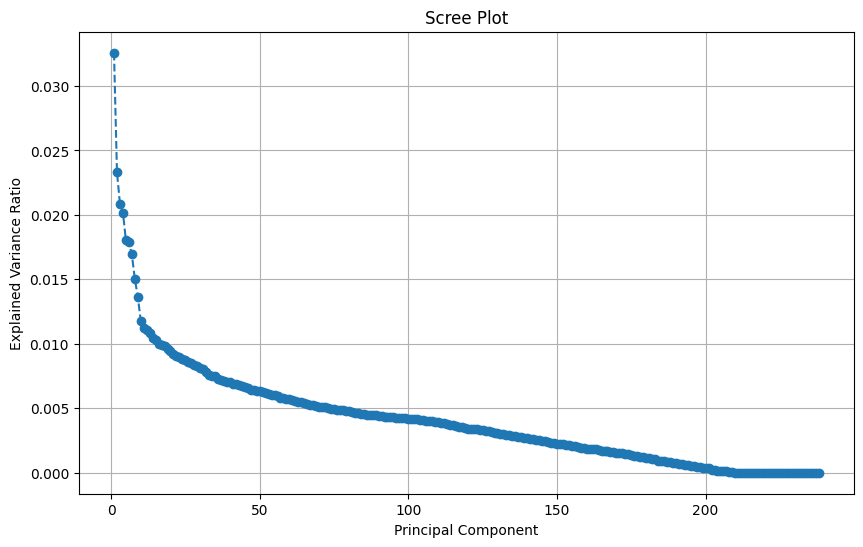

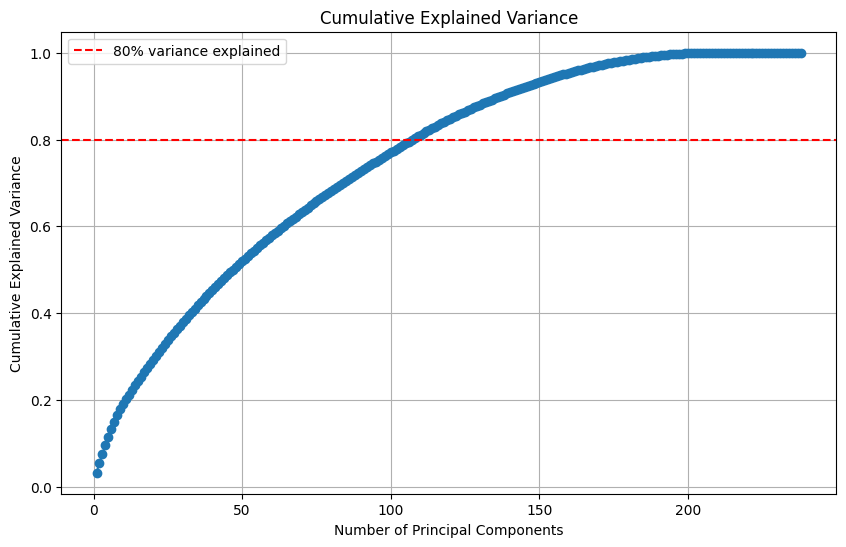

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()


# Start of Modeling

In [12]:

from sklearn.model_selection import train_test_split
import numpy as np


In [13]:

X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3116307	test: 0.3078687	best: 0.3078687 (0)	total: 190ms	remaining: 1m 34s
50:	learn: 0.2292713	test: 0.2470840	best: 0.2470840 (50)	total: 788ms	remaining: 6.94s
100:	learn: 0.2089287	test: 0.2301145	best: 0.2301145 (100)	total: 1.43s	remaining: 5.65s
150:	learn: 0.1986068	test: 0.2189023	best: 0.2189023 (150)	total: 2.04s	remaining: 4.72s
200:	learn: 0.1941771	test: 0.2135962	best: 0.2135962 (200)	total: 2.62s	remaining: 3.9s
250:	learn: 0.1920581	test: 0.2106447	best: 0.2106447 (250)	total: 3.18s	remaining: 3.15s
300:	learn: 0.1907738	test: 0.2091306	best: 0.2091306 (300)	total: 3.73s	remaining: 2.47s
350:	learn: 0.1901119	test: 0.2085248	best: 0.2085248 (350)	total: 4.29s	remaining: 1.82s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2082557883
bestIteration = 380

Shrink model to first 381 iterations.
Mean Squared Error (MSE): 0.04
R-squared (R²): 0.56
Root Mean Squared Error (RMSE): 0.21


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


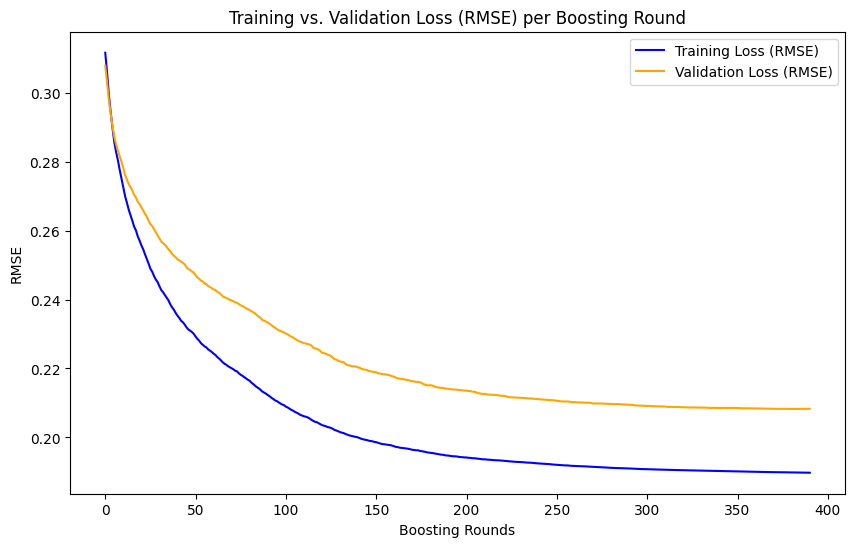

In [14]:
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Identify Categorical Features
categorical_features_indices = [X.columns.get_loc(col) for col in X.select_dtypes(include=['object', 'category']).columns]

# Step 4: Prepare the CatBoost data pools
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validation_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)

# Train the CatBoost Model with logging of evaluation metrics
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=50,
    random_seed=42,
    cat_features=categorical_features_indices,
    eval_metric='RMSE'  # Set appropriate evaluation metric for regression
)

# Fit the model with early stopping
model.fit(
    train_pool,
    eval_set=validation_pool,
    use_best_model=True,
    plot=True,
    early_stopping_rounds=10  # Enable early stopping
)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Extract training and validation loss from the evals result
eval_history = model.get_evals_result()
train_loss = eval_history['learn']['RMSE']
validation_loss = eval_history['validation']['RMSE']

# Plot training vs. validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()


In [15]:
# Get Feature Importance
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances)

    Feature Id  Importances
0          PC2    17.141410
1         PC23     2.377732
2          PC4     2.221858
3          PC9     2.206977
4         PC97     2.112854
..         ...          ...
103       PC10     0.218690
104       PC50     0.188653
105       PC19     0.107613
106       PC45     0.078230
107       PC26     0.055793

[108 rows x 2 columns]


In [16]:
# Get feature importance from CatBoost
feature_importances = model.get_feature_importance(prettified=True)

# Filter for features with importance greater than 1
important_features = feature_importances[feature_importances['Importances'] > 1]
print("Features with importance > 1:")
print(important_features)


Features with importance > 1:
   Feature Id  Importances
0         PC2    17.141410
1        PC23     2.377732
2         PC4     2.221858
3         PC9     2.206977
4        PC97     2.112854
5       PC104     1.950163
6        PC66     1.939510
7        PC11     1.860835
8        PC54     1.741898
9         PC7     1.690613
10       PC74     1.595756
11       PC35     1.575354
12        PC6     1.455850
13        PC5     1.375042
14       PC15     1.218801
15       PC93     1.137903
16        PC3     1.131599
17       PC82     1.127578
18       PC67     1.127380
19       PC29     1.124337
20        PC1     1.120389
21       PC89     1.085748
22       PC37     1.079059
23       PC84     1.058748
24       PC87     1.056350
25       PC55     1.047984
26       PC39     1.046406
27       PC18     1.044843


# final xgboost model

Cross-Validated MSE: 0.05
[0]	train-rmse:0.29534	eval-rmse:0.29693
[1]	train-rmse:0.27771	eval-rmse:0.28347
[2]	train-rmse:0.26493	eval-rmse:0.27424
[3]	train-rmse:0.25499	eval-rmse:0.26632
[4]	train-rmse:0.24674	eval-rmse:0.25984
[5]	train-rmse:0.24028	eval-rmse:0.25511
[6]	train-rmse:0.23283	eval-rmse:0.24882
[7]	train-rmse:0.22786	eval-rmse:0.24569
[8]	train-rmse:0.22188	eval-rmse:0.24002
[9]	train-rmse:0.21845	eval-rmse:0.23742
[10]	train-rmse:0.21513	eval-rmse:0.23510
[11]	train-rmse:0.21089	eval-rmse:0.23110
[12]	train-rmse:0.20756	eval-rmse:0.22778
[13]	train-rmse:0.20531	eval-rmse:0.22487
[14]	train-rmse:0.20345	eval-rmse:0.22373
[15]	train-rmse:0.20089	eval-rmse:0.22048
[16]	train-rmse:0.19928	eval-rmse:0.21880
[17]	train-rmse:0.19850	eval-rmse:0.21803
[18]	train-rmse:0.19755	eval-rmse:0.21718
[19]	train-rmse:0.19626	eval-rmse:0.21565
[20]	train-rmse:0.19542	eval-rmse:0.21502
[21]	train-rmse:0.19449	eval-rmse:0.21371
[22]	train-rmse:0.19390	eval-rmse:0.21294
[23]	train-rmse:0.

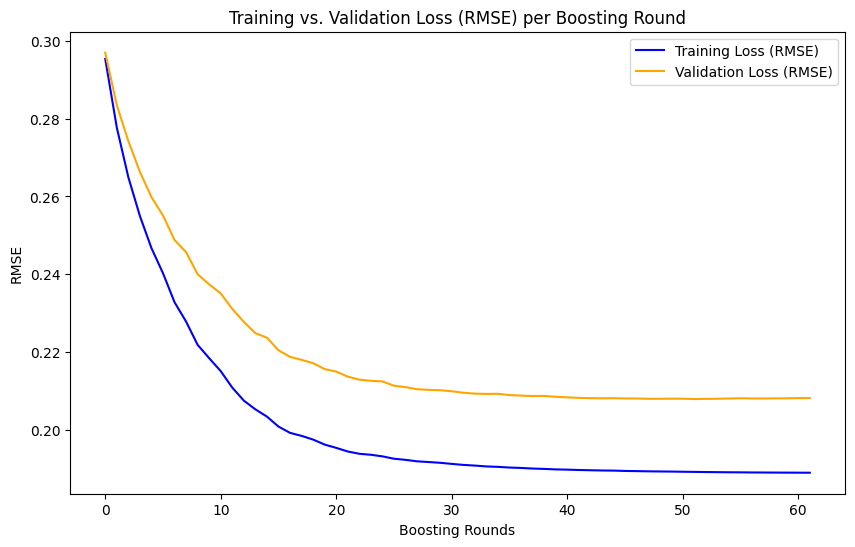

XGBoost - MSE: 0.04, R²: 0.56, RMSE: 0.21


In [17]:
from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBRegressor with additional regularization and reduced complexity
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to get an estimate of the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {mean_cv_mse:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6, #this affects the r2 th emost
    'learning_rate': 0.2,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'reg:squarederror',
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping, tracking both training and validation losses
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract train and eval loss from evals_result
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred = xgb_model_trained.predict(dtest)

# Evaluate the model's performance on the test set
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


# best outlier models

In [18]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------
# Local Outlier Factor (LOF)
# -----------------
print("Detecting outliers using Local Outlier Factor (LOF)...")
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
lof_outlier_labels = lof.fit_predict(X_train_scaled)  # -1 for outliers

# Filter out outliers from the training data
X_train_lof_cleaned = X_train_scaled[lof_outlier_labels == 1]
y_train_lof_cleaned = y_train[lof_outlier_labels == 1]

# Add LOF labels as features
lof_train_labels = (lof_outlier_labels == 1).astype(int)  # Convert to binary 1/0
X_train_lof = np.hstack([X_train_scaled, lof_train_labels.reshape(-1, 1)])
X_test_lof = np.hstack([X_test_scaled, np.ones((X_test_scaled.shape[0], 1))])  # Assume all test points are inliers

# Train and evaluate XGBRegressor with LOF
xgb_model_lof = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_lof.fit(X_train_lof, y_train)
lof_y_pred = xgb_model_lof.predict(X_test_lof)
lof_rmse = mean_squared_error(y_test, lof_y_pred, squared=False)  # RMSE
lof_r2 = r2_score(y_test, lof_y_pred)
print(f"LOF - RMSE: {lof_rmse:.2f}, R²: {lof_r2:.2f}")

# -----------------
# Isolation Forest
# -----------------
print("Detecting outliers using Isolation Forest...")
isolation_forest = IsolationForest(n_estimators=100, contamination=0.25, random_state=42)
outlier_train_labels = isolation_forest.fit_predict(X_train_scaled)
outlier_test_labels = isolation_forest.predict(X_test_scaled)

# Filter out outliers from the training data
X_train_cleaned = X_train_scaled[outlier_train_labels == 1]
y_train_cleaned = y_train[outlier_train_labels == 1]

# Add Isolation Forest labels as features
X_train_outliers = np.hstack([X_train_scaled, outlier_train_labels.reshape(-1, 1)])
X_test_outliers = np.hstack([X_test_scaled, outlier_test_labels.reshape(-1, 1)])

# Train and evaluate XGBRegressor with Isolation Forest
xgb_model_outliers = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_outliers.fit(X_train_outliers, y_train)
outlier_y_pred = xgb_model_outliers.predict(X_test_outliers)
outlier_rmse = mean_squared_error(y_test, outlier_y_pred, squared=False)  # RMSE
outlier_r2 = r2_score(y_test, outlier_y_pred)
print(f"Isolation Forest - RMSE: {outlier_rmse:.2f}, R²: {outlier_r2:.2f}")

# -----------------
# One-Class SVM
# -----------------
print("Detecting outliers using One-Class SVM...")
one_class_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
svm_outlier_labels_train = one_class_svm.fit_predict(X_train_scaled)  # -1 for outliers
svm_outlier_labels_test = one_class_svm.predict(X_test_scaled)

# Add One-Class SVM labels as features
svm_train_labels = (svm_outlier_labels_train == 1).astype(int)  # Convert to binary 1/0
svm_test_labels = (svm_outlier_labels_test == 1).astype(int)
X_train_svm = np.hstack([X_train_scaled, svm_train_labels.reshape(-1, 1)])
X_test_svm = np.hstack([X_test_scaled, svm_test_labels.reshape(-1, 1)])

# Train and evaluate XGBRegressor with One-Class SVM
xgb_model_svm = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_svm.fit(X_train_svm, y_train)
svm_y_pred = xgb_model_svm.predict(X_test_svm)
svm_rmse = mean_squared_error(y_test, svm_y_pred, squared=False)  # RMSE
svm_r2 = r2_score(y_test, svm_y_pred)
print(f"One-Class SVM - RMSE: {svm_rmse:.2f}, R²: {svm_r2:.2f}")


Detecting outliers using Local Outlier Factor (LOF)...


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LOF - RMSE: 0.21, R²: 0.56
Detecting outliers using Isolation Forest...


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Isolation Forest - RMSE: 0.21, R²: 0.56
Detecting outliers using One-Class SVM...
One-Class SVM - RMSE: 0.21, R²: 0.56


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# new model without outliers

In [38]:
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Outlier Detection on X_train



# Step 1: Outlier Detection
# Use Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_flags_iso = iso_forest.fit_predict(X_train)
X_train['outlier_iso'] = (outlier_flags_iso == -1).astype(int)

# Use Local Outlier Factor (LOF) to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_flags_lof = lof.fit_predict(X_train)
X_train['outlier_lof'] = (outlier_flags_lof == -1).astype(int)

# Combine the outlier flags (optional)
X_train['combined_outlier'] = ((X_train['outlier_iso'] + X_train['outlier_lof']) > 0).astype(int)

# Step 2: Clustering (to identify high-label clusters)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
X_train['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
X_train['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Step 3: Modify XGBoost to Use Huber and Quantile Loss
def train_xgboost(objective):
    params = {
        'max_depth': 6,
        'learning_rate': 0.1,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'objective': objective,
        'random_state': 42
    }
    #dtrain = DMatrix(X_train.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1), label=y_train)
    dtest = DMatrix(X_test, label=y_test)

    evals_result = {}
    xgb_model_trained = train(
        params,
        dtrain,
        num_boost_round=100,
        evals=[(dtrain, 'train'), (dtest, 'eval')],
        early_stopping_rounds=10,
        verbose_eval=True,
        evals_result=evals_result
    )
    return xgb_model_trained, evals_result

# Train with Huber loss
huber_model, huber_evals_result = train_xgboost('reg:pseudohubererror')

# Train with Quantile loss
quantile_model, quantile_evals_result = train_xgboost('reg:quantile')

# Step 4: Evaluate Outlier-Specific Model
outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Train only on the detected outliers
X_outliers = X_train[X_train['combined_outlier'] == 1].drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train['combined_outlier'] == 1]
outlier_model.fit(X_outliers, y_outliers)

# Step 5: Evaluation Metrics
def evaluate_model(model, X, y, label="Model"):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mad = np.mean(np.abs(predictions - np.median(y)))
    tail_rmse = np.sqrt(np.mean((predictions[y > np.quantile(y, 0.95)] - y[y > np.quantile(y, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the models
dtest = DMatrix(X_test)
evaluate_model(huber_model, dtest, y_test, label="Huber Loss Model")
evaluate_model(quantile_model, dtest, y_test, label="Quantile Loss Model")
evaluate_model(outlier_model, X_test, y_test, label="Outlier Model")

# Step 6: Plot Loss Curves for Huber and Quantile Models
plt.figure(figsize=(10, 6))
plt.plot(huber_evals_result['train']['rmse'], label='Huber Train RMSE', color='blue')
plt.plot(huber_evals_result['eval']['rmse'], label='Huber Validation RMSE', color='orange')
plt.plot(quantile_evals_result['train']['rmse'], label='Quantile Train RMSE', color='green')
plt.plot(quantile_evals_result['eval']['rmse'], label='Quantile Validation RMSE', color='red')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Huber vs. Quantile Loss - Training and Validation Loss')
plt.legend()
plt.show()


[0]	train-mphe:0.22108	eval-mphe:0.22437
[1]	train-mphe:0.17338	eval-mphe:0.17638
[2]	train-mphe:0.13969	eval-mphe:0.14255
[3]	train-mphe:0.11464	eval-mphe:0.11717
[4]	train-mphe:0.09540	eval-mphe:0.09799
[5]	train-mphe:0.08002	eval-mphe:0.08269
[6]	train-mphe:0.06839	eval-mphe:0.07121
[7]	train-mphe:0.05920	eval-mphe:0.06213
[8]	train-mphe:0.05169	eval-mphe:0.05464
[9]	train-mphe:0.04569	eval-mphe:0.04878
[10]	train-mphe:0.04082	eval-mphe:0.04397
[11]	train-mphe:0.03700	eval-mphe:0.04029
[12]	train-mphe:0.03382	eval-mphe:0.03719
[13]	train-mphe:0.03122	eval-mphe:0.03465
[14]	train-mphe:0.02924	eval-mphe:0.03272
[15]	train-mphe:0.02749	eval-mphe:0.03107
[16]	train-mphe:0.02613	eval-mphe:0.02977
[17]	train-mphe:0.02494	eval-mphe:0.02868
[18]	train-mphe:0.02393	eval-mphe:0.02772
[19]	train-mphe:0.02309	eval-mphe:0.02689
[20]	train-mphe:0.02242	eval-mphe:0.02632
[21]	train-mphe:0.02182	eval-mphe:0.02582
[22]	train-mphe:0.02135	eval-mphe:0.02538
[23]	train-mphe:0.02087	eval-mphe:0.02494
[2

XGBoostError: [14:41:54] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\objective.cc:31: Unknown objective function: `reg:quantile`
Objective candidate: rank:ndcg
Objective candidate: rank:pairwise
Objective candidate: rank:map
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: reg:quantileerror
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:gamma
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror


In [39]:
# Remove outliers from the training and testing data
X_train_no_outliers = X_train[X_train['combined_outlier'] == 0].drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)
y_train_no_outliers = y_train[X_train['combined_outlier'] == 0]

X_test_no_outliers = X_test[X_test['combined_outlier'] == 0].drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)
y_test_no_outliers = y_test[X_test['combined_outlier'] == 0]

# Train a new XGBoost model without outliers
xgb_no_outliers = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

xgb_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Evaluate the new model without outliers
no_outliers_preds = xgb_no_outliers.predict(X_test_no_outliers)
no_outliers_mse = mean_squared_error(y_test_no_outliers, no_outliers_preds)
no_outliers_rmse = np.sqrt(no_outliers_mse)
no_outliers_r2 = r2_score(y_test_no_outliers, no_outliers_preds)

print(f"Model Without Outliers - MSE: {no_outliers_mse:.2f}, RMSE: {no_outliers_rmse:.2f}, R²: {no_outliers_r2:.2f}")


KeyError: 'combined_outlier'

# combined models

In [40]:
# Align the columns of X_test to match X_train
X_test_aligned = X_test[X_train.columns]  # This ensures that the column order matches


KeyError: "['outlier_iso', 'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans'] not in index"

In [41]:
# Drop the outlier columns from both training and test sets
X_train_no_outliers = X_train.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)
X_test_no_outliers = X_test.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)

# Now align X_test_no_outliers with X_train_no_outliers
X_test_no_outliers_aligned = X_test_no_outliers[X_train_no_outliers.columns]


KeyError: "['outlier_iso', 'outlier_lof', 'combined_outlier'] not found in axis"

In [42]:
missing_columns = set(X_train.columns) - set(X_test.columns)
for col in missing_columns:
    X_test[col] = np.nan  # Add missing columns with NaN values

# Align columns after filling missing ones
X_test_aligned = X_test[X_train.columns]


In [36]:
import xgboost as xgb

# Convert X_test to DMatrix if needed
dtest = xgb.DMatrix(X_test_aligned)

# Predict using the main model
main_preds = xgb_model_trained.predict(dtest)


In [37]:
# Now make predictions with the main model on aligned test data
main_preds = xgb_model_trained.predict(X_test_aligned)

# Combine predictions into a new DataFrame
stacked_predictions = pd.DataFrame({
    'outlier_preds': outlier_preds,
    'main_preds': main_preds
})

# Combine the features with the predictions to create the final dataset for stacking
X_train_stack = pd.concat([X_train, stacked_predictions.loc[X_train.index, :]], axis=1)
X_test_stack = pd.concat([X_test, stacked_predictions.loc[X_test.index, :]], axis=1)


TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [38]:
# Check columns in X_train and X_test
print("Training data columns:", X_train.columns)
print("Test data columns:", X_test.columns)

# Align X_test columns with X_train columns
X_test = X_test[X_train.columns]  # This ensures X_test has the same columns as X_train


Training data columns: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'outlier_iso',
       'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans'],
      dtype='object', length=113)
Test data columns: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'outlier_iso',
       'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans'],
      dtype='object', length=113)


In [39]:
# Drop outlier columns consistently from both training and test data
#X_train = X_train.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)
#X_test = X_test.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)

print("Training data columns:", X_train.columns)
print("Test data columns:", X_test.columns)


Training data columns: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'outlier_iso',
       'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans'],
      dtype='object', length=113)
Test data columns: Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'outlier_iso',
       'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans'],
      dtype='object', length=113)


In [40]:
# Convert X_test to DMatrix format (required by XGBoost)
dtest = xgb.DMatrix(X_test)
dtrain = xgb.DMatrix(X_train)

In [41]:
# Ensure columns are aligned
X_test = X_test[X_train.columns]

# Drop the outlier columns from both train and test
#X_train = X_train.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)
#X_test = X_test.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)

# Ensure the prediction set matches the training set
dtest = xgb.DMatrix(X_test)  # Convert to DMatrix format
# Convert aligned X_test to DMatrix format

# Ensure X_test has the same columns as X_train before converting to DMatrix
X_test_aligned = X_test[X_train.columns]
dtest = xgb.DMatrix(X_test_aligned)



# Get predictions from the outlier model
outlier_preds = outlier_model.predict(X_test)

# Get predictions from the main XGBoost model
main_preds = xgb_model_trained.predict(dtest)

# Combine the predictions into a new DataFrame
stacked_predictions = pd.DataFrame({
    'outlier_preds': outlier_preds,
    'main_preds': main_preds
})

# Combine the features with the new predictions for stacking
X_train_stack = pd.concat([X_train, stacked_predictions.loc[X_train.index, :]], axis=1)
X_test_stack = pd.concat([X_test, stacked_predictions.loc[X_test.index, :]], axis=1)


ValueError: feature_names mismatch: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'cluster_dbscan', 'cluster_kmeans'] ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'outlier_iso', 'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans']
training data did not have the following fields: outlier_lof, combined_outlier, outlier_iso

In [42]:
# Get predictions from the outlier model
outlier_preds = outlier_model.predict(X_test_aligned)

# Get predictions from the main XGBoost model
main_preds = xgb_model_trained.predict(X_test_aligned)  # Using pandas DataFrame format

# Combine the predictions into a new DataFrame
stacked_predictions = pd.DataFrame({
    'outlier_preds': outlier_preds,
    'main_preds': main_preds
})

# Combine the features with the new predictions for stacking
X_train_stack = pd.concat([X_train, stacked_predictions.loc[X_train.index, :]], axis=1)
X_test_stack = pd.concat([X_test_aligned, stacked_predictions.loc[X_test.index, :]], axis=1)


ValueError: feature_names mismatch: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'cluster_dbscan', 'cluster_kmeans'] ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'outlier_iso', 'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans']
training data did not have the following fields: outlier_lof, combined_outlier, outlier_iso

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize a RandomForest model for stacking
stacking_model = RandomForestRegressor()

# Train the stacking model on the stacked training data
stacking_model.fit(X_train_stack, y_train)

# Get predictions from the stacking model
stacking_preds = stacking_model.predict(X_test_stack)


## code for stacking xgb and outlier models

In [82]:
# Stack the predictions
stacked_train = pd.DataFrame({
    'outlier_preds': outlier_preds_train,
    'xgb_preds': xgb_preds_train
})

stacked_test = pd.DataFrame({
    'outlier_preds': outlier_preds_test,
    'xgb_preds': xgb_preds_test
})

# Create a new DMatrix for the stacked model
stacked_dtrain = DMatrix(stacked_train, label=y_train)
stacked_dtest = DMatrix(stacked_test, label=y_test)


In [144]:
# Train a stacking model on top of the stacked predictions
stacked_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Train the stacked model
stacked_model.fit(stacked_train, y_train)

# Make predictions with the stacked model
stacked_preds = stacked_model.predict(stacked_test)


In [145]:
# Evaluate the stacked model
mse_stacked = mean_squared_error(y_test, stacked_preds)
rmse_stacked = np.sqrt(mse_stacked)
r2_stacked = r2_score(y_test, stacked_preds)

print(f"Stacked Model - MSE: {mse_stacked:.2f}, RMSE: {rmse_stacked:.2f}, R²: {r2_stacked:.2f}")


Stacked Model - MSE: 0.04, RMSE: 0.21, R²: 0.56


In [46]:
# Get predictions from outlier model (assuming outlier_model is already trained)
outlier_preds = outlier_model.predict(X_test.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1))

# Get predictions from the main model (after aligning columns of X_test with X_train)
main_preds = xgb_model_trained.predict(dtest)

# Combine the predictions from both models into a new DataFrame
stacked_predictions = pd.DataFrame({
    'outlier_preds': outlier_preds,
    'main_preds': main_preds
})

# Combine the stacked predictions with the original training and test features
X_train_stack = pd.concat([X_train, stacked_predictions.loc[X_train.index, :]], axis=1)
X_test_stack = pd.concat([X_test, stacked_predictions.loc[X_test.index, :]], axis=1)


KeyError: '[2420, 3214, 3185, 2297, 1421, 3522, 1345, 1808, 3787, 1503, 3127, 1601, 3442, 3682, 1670, 1536, 2700, 3303, 1461, 1647, 3355, 810, 2314, 2858, 3598, 1620, 2857, 3144, 1056, 3391, 1714, 2228, 3409, 3263, 2222, 3377, 1151, 3142, 2119, 838, 1656, 2751, 1370, 3471, 1609, 1814, 2575, 2071, 1795, 1896, 3637, 2159, 2932, 3628, 3488, 2610, 2994, 2519, 3278, 3695, 2669, 790, 3707, 3612, 2011, 2854, 1912, 1231, 965, 1793, 2688, 2208, 1483, 1378, 781, 2586, 3476, 1251, 2653, 3482, 3789, 2283, 1211, 3287, 2909, 2382, 1921, 1391, 2338, 1407, 1061, 2759, 3122, 1769, 3790, 1736, 2353, 3098, 2918, 879, 3139, 3064, 2130, 3136, 1338, 2015, 2465, 2538, 937, 3825, 2860, 3394, 1614, 2417, 1006, 1234, 3630, 1474, 1113, 1641, 2206, 2694, 2527, 2241, 3309, 3365, 2813, 1055, 3405, 3569, 907, 1861, 3684, 1552, 1075, 1674, 932, 2321, 1034, 2466, 2644, 3341, 1818, 1022, 3221, 1740, 2179, 1032, 3622, 1937, 1163, 1292, 3623, 3027, 1315, 3008, 1344, 2833, 874, 2339, 2242, 1011, 1829, 3020, 812, 840, 2886, 2704, 1003, 1018, 2905, 847, 905, 2273, 2673, 2629, 2878, 1414, 3712, 2266, 2555, 1233, 925, 3814, 2118, 1613, 3158, 1362, 1094, 3100, 1494, 1336, 3366, 2859, 1860, 1826, 2102, 3511, 1392, 1721, 3000, 3288, 1720, 3024, 1572, 921, 3415, 1222, 2268, 3636, 3220, 1558, 3103, 2893, 2526, 1116, 2335, 3565, 1532, 2672, 1553, 3531, 2251, 2341, 3454, 3375, 2412, 3403, 2963, 3820, 2505, 2582, 1178, 2104, 3011, 3642, 2046, 867, 926, 997, 2921, 1584, 3107, 1550, 1593, 1278, 3816, 2571, 3673, 1894, 1078, 1106, 3163, 3776, 2069, 1188, 1104, 940, 1080, 1662, 2216, 2570, 3608, 2028, 2233, 3669, 1110, 2670, 1499, 1632, 3475, 2978, 1037, 3095, 1161, 1904, 3094, 1831, 3750, 1089, 2634, 1864, 1741, 2083, 1979, 1448, 1512, 1822, 1965, 1134, 2367, 1053, 3578, 2426, 2194, 2177, 2917, 1067, 1226, 1210, 1298, 3780, 3111, 859, 3413, 2641, 1729, 3135, 3045, 2691, 1352, 3774, 3690, 1513, 3810, 3744, 3083, 942, 3685, 1288, 2562, 1967, 887, 2725, 789, 2097, 3116, 1361, 2943, 2019, 3791, 2018, 3559, 1490, 2475, 3305, 1425, 1987, 3613, 3548, 2820, 1798, 2063, 1779, 3554, 962, 945, 3515, 2381, 2934, 3310, 2895, 2095, 1600, 772, 3769, 3431, 3015, 3034, 3595, 2533, 2144, 1557, 1356, 2698, 2350, 844, 2525, 1467, 1973, 1422, 1880, 1546, 1351, 1366, 855, 2810, 944, 2718, 1488, 801, 2823, 1626, 1623, 2304, 3519, 2630, 2131, 2154, 1691, 2452, 1498, 3660, 1143, 3412, 3269, 3477, 3726, 3150, 1510, 2991, 3727, 3363, 2924, 2456, 1309, 1815, 2319, 1764, 3739, 2073, 1514, 3222, 994, 1580, 2702, 3078, 2067, 1236, 2313, 1972, 1036, 3710, 900, 3044, 1539, 3367, 2966, 2561, 1206, 3169, 981, 3621, 3372, 3423, 767, 2530, 2685, 2246, 2755, 3516, 819, 3505, 1283, 3539, 2916, 3347, 1103, 2334, 2819, 3063, 1611, 1442, 3834, 2954, 982, 3521, 2835, 2711, 3571, 3520, 2344, 1010, 1468, 3824, 2457, 1480, 3470, 1644, 2965, 2998, 2907, 2115, 845, 2596, 1457, 1196, 1102, 2564, 1618, 2023, 3264, 2384, 2762, 1048, 2712, 2383, 898, 2971, 3653, 2303, 1133, 2493, 2611, 2195, 1688, 1627, 2289, 1788, 930, 1862, 2648, 1907, 3106, 1502, 3529, 2132, 1090, 3055, 3224, 1181, 3589, 2290, 1651, 1786, 1124, 1339, 2500, 2096, 1675, 3271, 2149, 2548, 834, 3760, 2270, 2881, 1849, 2529, 1811, 3448, 2825, 1850, 783, 3284, 1717, 3145, 3071, 2110, 2392, 1918, 2865, 2515, 3346, 2732, 1271, 3376, 1127, 1694, 2440, 1983, 979, 1423, 3297, 3502, 911, 3793, 1606, 3373, 1747, 2078, 1846, 2408, 3252, 1465, 1538, 2003, 2034, 1232, 2925, 1582, 2249, 3562, 2422, 3603, 2531, 2776, 2793, 1253, 3196, 2402, 3176, 2020, 1752, 2464, 1684, 3186, 1093, 1376, 1936, 2707, 1586, 1005, 3678, 1956, 2189, 1745, 3400, 2164, 2446, 998, 1992, 1554, 1897, 1397, 3503, 3773, 3812, 2227, 2627, 1100, 1805, 3490, 3755, 2229, 3697, 1926, 1455, 1950, 1249, 2244, 1820, 3270, 1783, 1462, 2655, 2781, 2281, 856, 1225, 1190, 2098, 2743, 3564, 858, 1653, 1072, 3447, 2421, 3484, 3433, 2218, 2770, 2080, 2840, 3634, 2829, 3450, 2765, 2742, 1882, 3826, 3031, 1385, 1399, 1195, 3610, 1475, 2002, 3352, 2230, 2463, 1264, 1947, 958, 3542, 1971, 2245, 3319, 1374, 1286, 3821, 1368, 3706, 2498, 1877, 3473, 2022, 3132, 1739, 1179, 3246, 3811, 1703, 1587, 3022, 3004, 2274, 1357, 786, 3437, 788, 2583, 2103, 2618, 3537, 2252, 3225, 1960, 1891, 1873, 1744, 3322, 2318, 3573, 2476, 2884, 782, 1323, 3491, 1803, 3123, 2358, 1177, 1244, 2628, 2211, 2887, 3762, 2487, 2817, 941, 961, 841, 2117, 2579, 3026, 2044, 2232, 2615, 3384, 2442, 2340, 3209, 3466, 2591, 916, 2024, 2342, 1099, 1088, 3640, 2674, 1624, 2413, 821, 2805, 2377, 3619, 3097, 3141, 1302, 1000, 3154, 1953, 1505, 1477, 1637, 1667, 1125, 1404, 2970, 2589, 1977, 2347, 2769, 2091, 2238, 3514, 3501, 1791, 1608, 2566, 2654, 1009, 3075, 2213, 3259, 3494, 3527, 1677, 1310, 1966, 1830, 2414, 3493, 986, 2424, 2892, 1671, 2346, 1859, 1437, 2196, 1241, 1142, 2310, 1216, 1198, 1518, 2624, 1381, 1948, 1014, 1364, 3021, 1876, 891, 2462, 1359, 3563, 1317, 1451, 1847, 2494, 1207, 2753, 2370, 1208, 2913, 3091, 2798, 3479, 1239, 2045, 2471, 3292, 1229, 3236, 2545, 1874, 1945, 1780, 3362, 2647, 1058, 1024, 3198, 2247, 1316, 2968, 968, 1665, 1878, 1929, 2215, 1742, 3140, 3736, 1655, 2359, 2480, 3251, 2138, 3830, 3452, 1307, 2880, 3086, 3280, 3345, 1706, 2354, 1299, 3226, 3182, 2620, 843, 1801, 1628, 2436, 1730, 1033, 3784, 1326, 2815, 3042, 3439, 1447, 1472, 2708, 3349, 1186, 2826, 890, 2953, 3325, 1766, 2409, 1991, 1978, 3700, 2676, 1525, 3114, 2127, 1004, 836, 2279, 2042, 2689, 2822, 939, 1321, 2423, 2636, 1543, 2404, 866, 1760, 910, 2114, 1575, 1260, 2992, 2348, 1269, 2405, 1941, 2885, 1797, 931, 1441, 2337, 2920, 3215, 1535, 865, 3056, 1273, 2633, 2894, 2506, 1712, 3747, 3805, 2726, 1405, 2447, 2124, 3807, 3481, 3213, 1748, 861, 1840, 2226, 902, 1230, 2989, 3751, 1737, 923, 1666, 3794, 2679, 1375, 2540, 1746, 2212, 2997, 1835, 2807, 1756, 1927, 2948, 2429, 1590, 1170, 2025, 1266, 3766, 2221, 908, 2174, 3030, 2077, 3172, 970, 873, 1723, 808, 3286, 3192, 3256, 1337, 1413, 2877, 2276, 2307, 2787, 1999, 2535, 2357, 1883, 1713, 2588, 2486, 2666, 1393, 3775, 1382, 1096, 3650, 1925, 3525, 2697, 3379, 1328, 2121, 2791, 2092, 3194, 3662, 1189, 3534, 3633, 3602, 1689, 2176, 1952, 1949, 3331, 3404, 800, 2727, 3572, 2659, 2059, 3765, 1951, 2573, 2804, 1109, 2258, 3558, 1576, 2484, 778, 2736, 2364, 2043, 3156, 2632, 2400, 1567, 2903, 3398, 2256, 3746, 1343, 2013, 1087, 3708, 3709, 2584, 3498, 2507, 3401, 1763, 2891, 1259, 1559, 2406, 1963, 3421, 2637, 1709, 1050, 3093, 2856, 1083, 2259, 3831, 1809, 3719, 792, 2867, 1980, 3680, 2898, 1530, 1410, 2802, 3320, 3013, 2649, 1562, 973, 1710, 2495, 1098, 886, 2677, 2962, 3228, 1453, 3233, 3381, 2126, 906, 3392, 2958, 947, 2763, 2554, 2543, 3538, 2827, 3800, 885, 917, 3330, 2419, 1265, 2873, 3313, 988, 2084, 1245, 1435, 993, 2171, 2167, 1349, 1007, 2185, 2876, 2064, 3037, 2399, 1690, 3166, 1247, 1985, 1547, 2012, 2129, 3655, 1054, 3188, 2897, 2474, 3396, 3393, 2758, 1193, 1716, 2603, 3455, 3758, 2356, 1285, 2390, 2415, 3691, 2087, 1889, 1591, 3813, 2162, 2850, 3575, 1137, 3125, 3605, 3624, 1711, 3167, 913, 2764, 1199, 1274, 974, 983, 3792, 1418, 1560, 1486, 2441, 1355, 2288, 3819, 2510, 3248, 1640, 1290, 1380, 1933, 2030, 892, 780, 3159, 849, 2302, 1596, 1776, 1913, 1043, 1544, 3343, 3694, 1911, 2567, 824, 3426, 1389, 3138, 2396, 1607, 1594, 771, 1868, 1085, 2605, 1325, 1463, 806, 2351, 2374, 2108, 2717, 3764, 2234, 963, 3592, 3620, 2033, 2687, 1165, 2050, 2928, 2416, 2980, 1771, 3798, 3597, 2032, 3254, 2403, 813, 1914, 3232, 3770, 1804, 2760, 1131, 1449, 3714, 3358, 3607, 3079, 1194, 2369, 1121, 3716, 1182, 2801, 1466, 934, 3408, 2516, 826, 1521, 2937, 1817, 3443, 1039, 2501, 3308, 1561, 3518, 3210, 1112, 1223, 2547, 1508, 1750, 3429, 1341, 3204, 3585, 2473, 2378, 2580, 2322, 3440, 2678, 3815, 2803, 2550, 2430, 2592, 3467, 2868, 3390, 3283, 1040, 2664, 2120, 1524, 3265, 2248, 2714, 3763, 1762, 3258, 3239, 2638, 2607, 2496, 1333, 3041, 3536, 2509, 2058, 2682, 2609, 2512, 1386, 1845, 3761, 1599, 1708, 2040, 2668, 2315, 2821, 3427, 3644, 1622, 1401, 1700, 2915, 3012, 1379, 2089, 2175, 2749, 3357, 3101, 2051, 1301, 3237, 1304, 3386, 2106, 1303, 1387, 2481, 2836, 3693, 904, 3639, 1279, 3057, 3677, 2308, 3039, 3137, 3032, 3370, 1939, 2952, 1308, 3173, 914, 3523, 3833, 774, 2054, 2001, 943, 822, 909, 1523, 1311, 1111, 3535, 1287, 1790, 3389, 2007, 1858, 832, 1201, 2942, 2503, 2134, 2209, 2951, 1481, 777, 799, 1920, 3295, 2741, 1701, 2161, 3587, 987, 3212, 1394, 768, 3801, 3364, 2332, 2079, 951, 3268, 2262, 989, 3567, 2862, 1383, 1724, 1086, 3072, 2972, 1107, 848, 966, 3133, 2203, 1002, 3517, 3206, 2979, 3388, 1879, 3601, 1203, 1990, 3593, 2577, 2643, 2927, 875, 3438, 938, 2394, 3643, 3795, 3512, 3193, 3085, 2291, 2657, 936, 3666, 2360, 3734, 1332, 1934, 935, 2418, 1854, 3084, 2467, 1645, 2699, 1792, 1430, 2949, 1013, 1928, 2864, 2663, 1347, 827, 1639, 984, 2188, 3249, 2443, 2349, 2619, 3240, 2631, 2622, 3745, 2116, 1834, 793, 3528, 2371, 3235, 3711, 2263, 1900, 2788, 3049, 1932, 2730, 1865, 1658, 1857, 2243, 1277, 3696, 950, 1120, 2597, 2204, 922, 2800, 2035, 2772, 1692, 3231, 1471, 2601, 1202, 2438, 2626, 1669, 3544, 1970, 2151, 820, 1997, 3665, 1248, 3641, 3395, 2190, 3334, 1046, 1888, 2469, 1318, 3686, 3724, 3738, 2136, 3128, 1772, 3768, 2740, 2052, 1314, 1851, 3731, 2922, 3162, 1372, 1855, 1319, 2560, 3672, 3117, 2761, 1908, 3579, 2929, 2365, 1604, 1118, 3616, 1943, 3778, 2376, 3211, 1342, 1619, 3109, 2060, 2219, 1673, 1942, 2990, 2039, 901, 2306, 2026, 1917, 1828, 1573, 2137, 3353, 2187, 3227, 3277, 1433, 2373, 3113, 3316, 1458, 3446, 846, 1464, 2621, 946, 2021, 2551, 1629, 1870, 1755, 1246, 919, 2595, 1063, 2590, 2899, 1160, 3203, 2844, 2563, 2671, 1526, 1605, 3557, 3804, 2709, 2957, 3411, 1989, 2987, 2362, 1975, 1761, 1305, 2739, 1541, 3321, 2472, 2642, 2941, 1493, 2275, 2882, 1169, 3129, 3453, 2072, 2192, 2133, 1254, 3160, 1976, 3130, 2955, 2075, 1654, 3414, 2883, 3368, 3626, 1774, 2410, 3435, 918, 1646, 1026, 1030, 882, 1335, 2746, 2828, 2713, 2125, 2766, 3387, 1276, 3360, 2055, 1280, 1049, 2397, 1079, 2286, 2261, 1144, 3038, 2296, 2841, 1836, 1753, 1101, 1968, 2889, 3500, 2280, 2692, 1428, 2581, 3326, 1489, 2986, 3441, 3508, 1887, 1719, 899, 1935, 1994, 2940, 2158, 3344, 2173, 1473, 2100, 2593, 1875, 2832, 3543, 2231, 796, 2180, 2128, 1019, 2910, 1331, 2017, 2482, 2906, 1358, 2845, 2145, 1329, 3808, 2785, 3717, 2150, 2122, 2900, 3043, 3664, 3754, 2448, 1848, 3324, 1984, 770, 2165, 2201, 1574, 2142, 2081, 3339, 3275, 3497, 1469, 3053, 3335, 2048, 1901, 3178, 1168, 3081, 2724, 1460, 2818, 1893, 1668, 2756, 2000, 3306, 3827, 2152, 1633, 3654, 3105, 2874, 1240, 852, 3553, 3151, 1262, 2193, 1824, 3230, 3667, 3311, 3424, 2871, 2497, 1944, 1838, 2930, 1617, 1581, 2956, 924, 3541, 3014, 2508, 2036, 3058, 1224, 3006, 2549, 1946, 868, 2779, 2745, 3197, 2723, 1371, 1145, 1031, 3019, 967, 2831, 2783, 1353, 1035, 3018, 3487, 1396, 3729, 1549, 1256, 2094, 1555, 3469, 1250, 1699, 1252, 3530, 3552, 2933, 1172, 814, 1852, 2220, 2719, 3351, 2105, 1140, 933, 928, 823, 1531, 1214, 3786, 2395, 1996, 2434, 1958, 1384, 894, 828, 3728, 2523, 1683, 3282, 3260, 3201, 3657, 3771, 1205, 2923, 3148, 3294, 1827, 1155, 1324, 1680, 3155, 1856, 1388, 1519, 2386, 3472, 2076, 1540, 1217, 2681, 3661, 2993, 1416, 2217, 3208, 1676, 1197, 1542, 2960, 2539, 953, 3080, 2635, 2705, 3823, 1156, 3281, 2445, 2982, 1209, 1065, 2156, 1062, 2616, 1167, 1492, 2938, 2995, 3096, 3149, 884, 3757, 850, 2782, 3631, 2502, 2492, 3244, 2224, 3090, 3574, 1365, 3468, 1903, 2109, 1296, 1821, 872, 3307, 3718, 2326, 1548, 2710, 3218, 2143, 3257, 977, 1571, 1122, 2786, 2239, 2967, 2504, 1892, 2808, 3068, 3146, 1516, 1649, 825, 3069, 1625, 3017, 2652, 3752, 2896, 3338, 2082, 2546, 1630, 2444, 1066, 1191, 1440, 3582, 3577, 2738, 3456, 1568, 2427, 2737, 3285, 1687, 851, 2207, 895, 2305, 1782, 2839, 3087, 1348, 1015, 2816, 3590, 3584, 2809, 3279, 3818, 1781, 2569, 1785, 2070, 3679, 1312, 1635, 2388, 2479, 2521, 2265, 2959, 1227, 3615, 3059, 957, 1773, 2141, 1008, 3118, 1092, 3410, 2744, 3796, 996, 1679, 3147, 3555, 2908, 2837, 1470, 1212, 896, 1141, 1119, 2849, 3293, 1664, 1012, 1931, 1150, 2838, 3586, 3526, 1974, 1081, 1810, 830, 3809, 3434, 3741, 2703, 2983, 2870, 2914, 3545, 991, 876, 773, 1219, 1126, 3051, 1595, 3124, 2311, 3040, 3670, 2491, 3050, 1077, 837, 1715, 2352, 2617, 2361, 2197, 1148, 3261, 853, 1982, 2774, 1823, 833, 1115, 1166, 2518, 1906, 971, 2701, 2559, 2368, 2950, 3617, 2875, 2455, 920, 1841, 1890, 2806, 1705, 3740, 3110, 3247, 3175, 784, 1409, 2537, 3009, 1686, 2901, 3359, 2733, 3674, 1346, 3742, 1758, 1816, 2065, 3327, 3803, 2006, 2975, 980, 3799, 1139, 992, 3486, 2544, 3546, 1060, 3604, 3676, 2565, 1069, 2524, 2205, 1243, 3243, 3120, 3806, 3449, 3067, 3492, 1504, 959, 2926, 2331, 797, 3348, 2074, 3354, 1799, 2485, 3782, 2277, 2085, 1693, 2797, 1045, 954, 3802, 2735, 3683, 3549, 1218, 1158, 1415, 3743, 1527, 3730, 1300, 3663, 2848, 1603, 1704, 956, 3234, 2869, 3722, 877, 1919, 2961, 1884, 2200, 3614, 2557, 3183, 3298, 1445, 1443, 1648, 1696, 3191, 2101, 2199, 1154, 2255, 2863, 1682, 3170, 3588, 2056, 3062, 3635, 3108, 2301, 1327, 2944, 2049, 880, 3725, 2393, 3540, 1787, 1634, 3369, 1438, 2198, 1969, 2520, 1802, 3817, 2385, 2598, 3618, 1959, 2976, 1843, 1734, 2911, 3219, 1534, 1986, 1369, 2450, 3748, 3002, 2811, 1794, 3420, 2511, 3397, 1147, 3272, 2191, 2799, 1930, 3029, 2931, 2327, 3255, 3510, 835, 2294, 1439, 1733, 1695, 3737, 1707, 3720, 1153, 1661, 3474, 2432, 3596, 1759, 854, 1589, 2267, 2160, 3749, 2999, 1636, 3184, 3458, 3457, 3581, 1291, 3649, 2489, 1520, 1853, 1136, 3304, 3704, 1631, 3445, 1998, 1257, 3611, 1434, 1479, 3430, 1282, 1768, 972, 2675, 2680, 1306, 1400, 1408, 3296, 2237, 3302, 1496, 3419, 2038, 1529, 1663, 1354, 3733, 3759, 1643, 1051, 795, 2693, 3060, 1597, 2604, 2729, 2625, 1819, 3157, 3314, 1722, 1183, 2572, 1059, 3242, 1678, 2796, 3692, 3478, 2532, 1757, 1923, 1020, 3312, 2790, 863, 3646, 1484, 2939, 3625, 1881, 1038, 2842, 870, 2814, 3681, 3289, 1028, 2690, 1485, 2660, 960, 1570, 2773, 1895, 2731, 2146, 804, 1751, 3645, 2454, 3119, 3104, 2977, 779, 1863, 2182, 3099, 2088, 3065, 2278, 3561, 1796, 2336, 1698, 2640, 1522, 1162, 3134, 1495, 2695, 2027, 1152, 1367, 2568, 2062, 1180, 3112, 2235, 2264, 791, 1076, 878, 2767, 2343, 1016, 1275, 3533, 3342, 815, 2317, 995, 1981, 1579, 2777, 2449, 1500, 1129, 2613, 3461, 1021, 3073, 3459, 1585, 1955, 3152, 2253, 775, 2556, 3499, 1478, 3003, 1390, 2139, 1363, 2945, 2612, 3417, 2824, 2041, 2061, 2363, 2435, 1297, 2214, 2888, 2068, 3556, 3202, 1528, 2879, 1267, 3638, 1899, 3785, 2734, 3005, 1806, 975, 2747, 3547, 2047, 3753, 2558, 1082, 3632, 2904, 2300, 3385, 1184, 2324, 955, 1215, 2433, 2853, 3485, 1515, 2391, 769, 3380, 1685, 3735, 2919, 3171, 3444, 2135, 1482, 1238, 2169, 1638, 3092, 3772, 1095, 1130, 1294, 860, 3507, 3174] not in index'

In [ ]:
# Initialize a new XGBoost model for stacking
stacked_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Train the stacked model using the stacked predictions
stacked_model.fit(X_train_stack, y_train)

# Evaluate the stacked model
stacked_preds = stacked_model.predict(X_test_stack)

# Evaluate the stacked model's performance
stacked_mse = mean_squared_error(y_test, stacked_preds)
stacked_rmse = np.sqrt(stacked_mse)
stacked_r2 = r2_score(y_test, stacked_preds)

print(f"Stacked Model - MSE: {stacked_mse:.2f}, RMSE: {stacked_rmse:.2f}, R²: {stacked_r2:.2f}")


# KNN and DBSCAN outlier detection

In [43]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [44]:
neighbors = NearestNeighbors(n_neighbors=216)
neighbors_fit = neighbors.fit(first_108_pcs_df)
distances, indices = neighbors_fit.kneighbors(first_108_pcs_df)

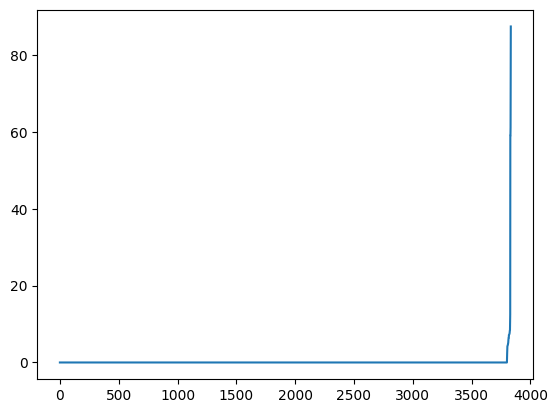

In [45]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [46]:
from sklearn.cluster import DBSCAN
import hdbscan

first_108_pcs_df2 = first_108_pcs_df.copy()
# DBSCAN clustering
dbscan = DBSCAN(eps=7, min_samples=10)
dbscan_labels = dbscan.fit_predict(first_108_pcs_df2)

# HDBSCAN clustering (if you prefer hierarchical)
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=216)
hdbscan_labels = hdbscan_model.fit_predict(first_108_pcs_df2)

# Print cluster info
print(f"DBSCAN clusters: {set(dbscan_labels)}")
print(f"HDBSCAN clusters: {set(hdbscan_labels)}")


DBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
HDBSCAN clusters: {-1}


In [47]:
import pandas as pd
from collections import Counter

# Analyze cluster sizes
cluster_counts = Counter(dbscan_labels)
print(f"Cluster sizes: {cluster_counts}")

# Mark small clusters (e.g., < 5 points) as outliers
outlier_clusters = {cluster for cluster, size in cluster_counts.items() if size < 3}
first_108_pcs_df2['Cluster'] = dbscan_labels
first_108_pcs_df2['Is_Outlier'] = first_108_pcs_df2['Cluster'].apply(lambda x: x in outlier_clusters)


Cluster sizes: Counter({0: 1842, -1: 1210, 2: 91, 3: 58, 7: 57, 4: 54, 10: 50, 15: 36, 16: 32, 6: 29, 14: 28, 12: 24, 13: 24, 8: 20, 17: 16, 21: 16, 30: 16, 34: 14, 11: 14, 24: 14, 5: 12, 32: 12, 33: 12, 18: 12, 19: 12, 20: 12, 22: 12, 23: 12, 28: 12, 35: 12, 1: 10, 9: 10, 25: 10, 26: 10, 27: 10, 29: 10, 31: 10})


In [48]:
# Profile clusters by feature means/medians
cluster_profiles = first_108_pcs_df2.groupby('Cluster').mean()

# Identify key features for each cluster
top_features = {}
for cluster in cluster_profiles.index:
    if cluster == -1:  # Skip noise
        continue
    top_features[cluster] = cluster_profiles.loc[cluster].nlargest(3).index.tolist()

# Assign descriptive names to clusters
cluster_names = {cluster: f"Cluster-{cluster} ({', '.join(features)})"
                 for cluster, features in top_features.items()}
first_108_pcs_df2['Cluster_Name'] = first_108_pcs_df2['Cluster'].map(cluster_names)


In [54]:
from sklearn.cluster import DBSCAN
import hdbscan
import numpy as np
from collections import Counter
first_108_pcs_df2 = first_108_pcs_df.copy()

# Scaling data (ensure the data is standardized)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(first_108_pcs_df2)

# DBSCAN clustering with adjusted parameters
dbscan = DBSCAN(eps=7, min_samples=10)  # Adjusted eps and min_samples
dbscan_labels = dbscan.fit_predict(scaled_data)

# HDBSCAN clustering with adjusted parameters
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=10)  # Adjusted params
hdbscan_labels = hdbscan_model.fit_predict(scaled_data)

# Cluster sizes and outlier marking for DBSCAN
dbscan_cluster_counts = Counter(dbscan_labels)
dbscan_outliers = {cluster for cluster, size in dbscan_cluster_counts.items() if size < 3}

first_108_pcs_df2['DBSCAN_Cluster'] = dbscan_labels
first_108_pcs_df2['Is_Outlier_DBSCAN'] = first_108_pcs_df2['DBSCAN_Cluster'].apply(lambda x: x in dbscan_outliers)

# Profiling clusters for feature analysis
dbscan_profiles = first_108_pcs_df2.groupby('DBSCAN_Cluster').mean()
dbscan_top_features = {
    cluster: dbscan_profiles.loc[cluster].nlargest(3).index.tolist()
    for cluster in dbscan_profiles.index if cluster != -1
}

# Assign cluster names
dbscan_cluster_names = {
    cluster: f"Cluster-{cluster} ({', '.join(features)})"
    for cluster, features in dbscan_top_features.items()
}
first_108_pcs_df2['Cluster_Name_DBSCAN'] = first_108_pcs_df2['DBSCAN_Cluster'].map(dbscan_cluster_names)

# Print results
print(f"DBSCAN clusters: {set(dbscan_labels)}")
print(f"DBSCAN cluster sizes: {dbscan_cluster_counts}")
print(f"HDBSCAN clusters: {set(hdbscan_labels)}")


DBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, -1}
DBSCAN cluster sizes: Counter({0: 2281, -1: 819, 3: 66, 4: 58, 10: 57, 12: 50, 7: 44, 15: 36, 16: 36, 8: 28, 14: 28, 18: 25, 5: 20, 19: 20, 2: 18, 24: 18, 6: 16, 17: 16, 20: 16, 26: 16, 31: 16, 11: 15, 27: 15, 1: 14, 13: 14, 23: 13, 9: 12, 22: 12, 21: 12, 28: 12, 30: 12, 25: 10, 29: 10})
HDBSCAN clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, -1}


In [55]:
first_108_pcs_df2.shape

(3835, 111)

In [57]:

first_108_pcs_df3 = pd.get_dummies(first_108_pcs_df2, drop_first=True)


In [58]:

X2 = first_108_pcs_df3  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.cluster import DBSCAN
from kmodes.kmodes import KModes
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)
'''
# Standardize the data for DBSCAN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DBSCAN implementation
print("Running DBSCAN clustering...")
dbscan = DBSCAN(eps=9, min_samples=216)
dbscan_labels_train = dbscan.fit_predict(X_train_scaled)
dbscan_labels_test = dbscan.fit_predict(X_test_scaled)
'''

# Append DBSCAN labels as features
X_train_dbscan = np.hstack([X_train2, dbscan_labels_train.reshape(-1, 1)])
X_test_dbscan = np.hstack([X_test2, dbscan_labels_test.reshape(-1, 1)])


# Retrain XGBRegressor with DBSCAN labels
xgb_model_dbscan = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_dbscan.fit(X_train_dbscan, y_train)
dbscan_y_pred = xgb_model_dbscan.predict(X_test_dbscan)

# Evaluate DBSCAN-enhanced model
dbscan_mse = mean_squared_error(y_test, dbscan_y_pred)
dbscan_r2 = r2_score(y_test, dbscan_y_pred)
print(f"DBSCAN - MSE: {dbscan_mse:.2f}, R²: {dbscan_r2:.2f}")

# KModes implementation
print("Running KModes clustering...")
kmodes = KModes(n_clusters=5, init='Huang', random_state=42)
kmodes_labels_train = kmodes.fit_predict(X_train)
kmodes_labels_test = kmodes.predict(X_test)

'''
# Append KModes labels as features
X_train_kmodes = np.hstack([X_train, kmodes_labels_train.reshape(-1, 1)])
X_test_kmodes = np.hstack([X_test, kmodes_labels_test.reshape(-1, 1)])

# Retrain XGBRegressor with KModes labels
xgb_model_kmodes = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
xgb_model_kmodes.fit(X_train_kmodes, y_train)
kmodes_y_pred = xgb_model_kmodes.predict(X_test_kmodes)

# Evaluate KModes-enhanced model
kmodes_mse = mean_squared_error(y_test, kmodes_y_pred)
kmodes_r2 = r2_score(y_test, kmodes_y_pred)
print(f"KModes - MSE: {kmodes_mse:.2f}, R²: {kmodes_r2:.2f}")
'''


NameError: name 'dbscan_labels_train' is not defined

In [60]:
from xgboost import XGBClassifier, DMatrix, train
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------
# Local Outlier Factor (LOF)
# -----------------
print("Detecting outliers using Local Outlier Factor (LOF)...")
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
lof_outlier_labels = lof.fit_predict(X_train_scaled)  # -1 for outliers

# Filter out outliers from the training data
X_train_lof_cleaned = X_train_scaled[lof_outlier_labels == 1]
y_train_lof_cleaned = y_train[lof_outlier_labels == 1]

# Add LOF labels as features
lof_train_labels = (lof_outlier_labels == 1).astype(int)  # Convert to binary 1/0
X_train_lof = np.hstack([X_train_scaled, lof_train_labels.reshape(-1, 1)])
X_test_lof = np.hstack([X_test_scaled, np.ones((X_test_scaled.shape[0], 1))])  # Assume all test points are inliers

# Train and evaluate XGBRegressor with LOF
xgb_model_lof = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
# Run cross-validation to estimate the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')  # Scoring set to 'accuracy'
mean_cv_accuracy = cv_scores.mean()
print(f"Cross-Validated Accuracy: {mean_cv_accuracy:.2f}")

xgb_model_lof.fit(X_train_lof, y_train)
lof_y_pred = xgb_model_lof.predict(X_test_lof)
lof_rmse = mean_squared_error(y_test, lof_y_pred, squared=False)  # RMSE
lof_r2 = r2_score(y_test, lof_y_pred)
print(f"LOF - RMSE: {lof_rmse:.2f}, R²: {lof_r2:.2f}")

# Make predictions on the test set
xgb_y_pred_prob = xgb_model_trained.predict(dtest)
xgb_y_pred = (xgb_y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, xgb_y_pred)
macro_f1 = f1_score(y_test, xgb_y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


# -----------------
# Isolation Forest
# -----------------
print("Detecting outliers using Isolation Forest...")
isolation_forest = IsolationForest(n_estimators=100, contamination=0.25, random_state=42)
outlier_train_labels = isolation_forest.fit_predict(X_train_scaled)
outlier_test_labels = isolation_forest.predict(X_test_scaled)

# Filter out outliers from the training data
X_train_cleaned = X_train_scaled[outlier_train_labels == 1]
y_train_cleaned = y_train[outlier_train_labels == 1]

# Add Isolation Forest labels as features
X_train_outliers = np.hstack([X_train_scaled, outlier_train_labels.reshape(-1, 1)])
X_test_outliers = np.hstack([X_test_scaled, outlier_test_labels.reshape(-1, 1)])

# Train and evaluate XGBRegressor with Isolation Forest
xgb_model_outliers = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Run cross-validation to estimate the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')  # Scoring set to 'accuracy'
mean_cv_accuracy = cv_scores.mean()
print(f"Cross-Validated Accuracy: {mean_cv_accuracy:.2f}")

xgb_model_outliers.fit(X_train_outliers, y_train)
outlier_y_pred = xgb_model_outliers.predict(X_test_outliers)
outlier_rmse = mean_squared_error(y_test, outlier_y_pred, squared=False)  # RMSE
outlier_r2 = r2_score(y_test, outlier_y_pred)
print(f"Isolation Forest - RMSE: {outlier_rmse:.2f}, R²: {outlier_r2:.2f}")

# -----------------
# One-Class SVM
# -----------------
print("Detecting outliers using One-Class SVM...")
one_class_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
svm_outlier_labels_train = one_class_svm.fit_predict(X_train_scaled)  # -1 for outliers
svm_outlier_labels_test = one_class_svm.predict(X_test_scaled)

# Add One-Class SVM labels as features
svm_train_labels = (svm_outlier_labels_train == 1).astype(int)  # Convert to binary 1/0
svm_test_labels = (svm_outlier_labels_test == 1).astype(int)
X_train_svm = np.hstack([X_train_scaled, svm_train_labels.reshape(-1, 1)])
X_test_svm = np.hstack([X_test_scaled, svm_test_labels.reshape(-1, 1)])

# Train and evaluate XGBRegressor with One-Class SVM
xgb_model_svm = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Run cross-validation to estimate the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')  # Scoring set to 'accuracy'
mean_cv_accuracy = cv_scores.mean()
print(f"Cross-Validated Accuracy: {mean_cv_accuracy:.2f}")

xgb_model_svm.fit(X_train_svm, y_train)
svm_y_pred = xgb_model_svm.predict(X_test_svm)
svm_rmse = mean_squared_error(y_test, svm_y_pred, squared=False)  # RMSE
svm_r2 = r2_score(y_test, svm_y_pred)
print(f"One-Class SVM - RMSE: {svm_rmse:.2f}, R²: {svm_r2:.2f}")


Detecting outliers using Local Outlier Factor (LOF)...


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312

Cross-Validated Accuracy: nan


C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30], got [0.16666667 0.27777778 0.33333333 0.44444444 0.5        0.55555556
 0.61111111 0.66666667 0.72222222 0.77777778 0.83333333 0.88888889
 0.94444444 1.         1.05555556 1.11111111 1.16666667 1.22222222
 1.27777778 1.33333333 1.38888889 1.44444444 1.5        1.61111111
 1.66666667 1.72222222 1.77777778 1.83333333 1.88888889 1.94444444
 2.        ]

In [61]:
from xgboost import XGBClassifier, DMatrix, train
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize the XGBClassifier with additional regularization and reduced complexity
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,       # Reduced depth to limit complexity
    reg_alpha=0.1,     # L1 regularization
    reg_lambda=0.1,    # L2 regularization
    random_state=42
)

# Run cross-validation to estimate the model's performance
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')  # Scoring set to 'accuracy'
mean_cv_accuracy = cv_scores.mean()
print(f"Cross-Validated Accuracy: {mean_cv_accuracy:.2f}")

# Prepare data in DMatrix format for training with early stopping
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameters for the XGBoost model
params = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'objective': 'binary:logistic',  # Binary classification objective
    'random_state': 42
}

# Update evals list to include both training and validation sets
evals = [(dtrain, 'train'), (dtest, 'eval')]

# Train the XGBoost model with early stopping
evals_result = {}
xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Extract training and validation losses from evals_result
train_loss = evals_result['train']['logloss']
validation_loss = evals_result['eval']['logloss']

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (Log Loss)', color='blue')
plt.plot(validation_loss, label='Validation Loss (Log Loss)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('Training vs. Validation Loss (Log Loss) per Boosting Round')
plt.legend()
plt.show()

# Make predictions on the test set
xgb_y_pred_prob = xgb_model_trained.predict(dtest)
xgb_y_pred = (xgb_y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, xgb_y_pred)
macro_f1 = f1_score(y_test, xgb_y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Macro F1 Score: {macro_f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Muru\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30], got [0.16666667 0.27777778 0.33333333 0.44444444 0.5        0.55555556
 0.61111111 0.66666667 0.72222222 0.77777778 0.83333333 0.88888889
 0.94444444 1.         1.05555556 1.11111111 1.16666667 1.22222222
 1.27777778 1.33333333 1.38888889 1.44444444 1.5        1.61111111
 1.66666667 1.72222222 1.77777778 1.83333333 1.88888889 1.94444444
 2.        ]


In [62]:
from sklearn.cluster import DBSCAN
from kmodes.kmodes import KModes
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import numpy as np
from sklearn.linear_model import LinearRegression


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

# DBSCAN implementation
print("Running DBSCAN clustering...")
dbscan = DBSCAN(eps=9, min_samples=216)
dbscan_labels_train = dbscan.fit_predict(X_train_scaled)
dbscan_labels_test = dbscan.fit_predict(X_test_scaled)

# Append DBSCAN labels as features
X_train_dbscan = np.hstack([X_train2, dbscan_labels_train.reshape(-1, 1)])
X_test_dbscan = np.hstack([X_test2, dbscan_labels_test.reshape(-1, 1)])

# KModes implementation
print("Running KModes clustering...")
kmodes = KModes(n_clusters=5, init='Huang', random_state=42)
kmodes_labels_train = kmodes.fit_predict(X_train2)
kmodes_labels_test = kmodes.predict(X_test2)

X_train_kmodes = np.hstack([X_train2, kmodes_labels_train.reshape(-1, 1)])
X_test_kmodes = np.hstack([X_test2, kmodes_labels_test.reshape(-1, 1)])

# Isolation Forest for anomaly detection
print("Applying Isolation Forest...")
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
iso_train = isolation_forest.fit_predict(X_train_scaled)
iso_test = isolation_forest.predict(X_test_scaled)

# One-Class SVM
print("Applying One-Class SVM...")
one_class_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)
osvm_train = one_class_svm.fit_predict(X_train_scaled)
osvm_test = one_class_svm.predict(X_test_scaled)

# LOF for anomaly detection
print("Applying LOF...")
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_train = lof.fit_predict(X_train_scaled)
lof_test = lof.fit_predict(X_test_scaled)

# Aggregate features
X_train_combined = np.hstack([
    X_train_dbscan, kmodes_labels_train.reshape(-1, 1),
    iso_train.reshape(-1, 1), osvm_train.reshape(-1, 1), lof_train.reshape(-1, 1)
])
X_test_combined = np.hstack([
    X_test_dbscan, kmodes_labels_test.reshape(-1, 1),
    iso_test.reshape(-1, 1), osvm_test.reshape(-1, 1), lof_test.reshape(-1, 1)
])

# Train base regressors
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Stacking regressor
print("Building Stacking Regressor...")
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('gbr', gb_model)
    ],
    final_estimator=LinearRegression()
)

# Train the model
stacking_regressor.fit(X_train_combined, y_train)

# Make predictions
y_pred = stacking_regressor.predict(X_test_combined)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Stacking Model - RMSE: {rmse:.2f}, R²: {r2:.2f}")

Running DBSCAN clustering...
Running KModes clustering...
Applying Isolation Forest...
Applying One-Class SVM...
Applying LOF...
Building Stacking Regressor...
Stacking Model - RMSE: 0.21, R²: 0.55


# outlier models

Cross-Validated MSE after Windsorization: 0.04
[0]	train-rmse:0.27956	eval-rmse:0.28218
[1]	train-rmse:0.26962	eval-rmse:0.27399
[2]	train-rmse:0.26073	eval-rmse:0.26764
[3]	train-rmse:0.25297	eval-rmse:0.26178
[4]	train-rmse:0.24675	eval-rmse:0.25713
[5]	train-rmse:0.24086	eval-rmse:0.25283
[6]	train-rmse:0.23559	eval-rmse:0.24918
[7]	train-rmse:0.23132	eval-rmse:0.24596
[8]	train-rmse:0.22745	eval-rmse:0.24290
[9]	train-rmse:0.22402	eval-rmse:0.24037
[10]	train-rmse:0.22096	eval-rmse:0.23775
[11]	train-rmse:0.21812	eval-rmse:0.23538
[12]	train-rmse:0.21482	eval-rmse:0.23254
[13]	train-rmse:0.21180	eval-rmse:0.22994
[14]	train-rmse:0.20956	eval-rmse:0.22828
[15]	train-rmse:0.20725	eval-rmse:0.22666
[16]	train-rmse:0.20535	eval-rmse:0.22512
[17]	train-rmse:0.20355	eval-rmse:0.22400
[18]	train-rmse:0.20129	eval-rmse:0.22210
[19]	train-rmse:0.19963	eval-rmse:0.22041
[20]	train-rmse:0.19803	eval-rmse:0.21921
[21]	train-rmse:0.19623	eval-rmse:0.21763
[22]	train-rmse:0.19485	eval-rmse:0.216

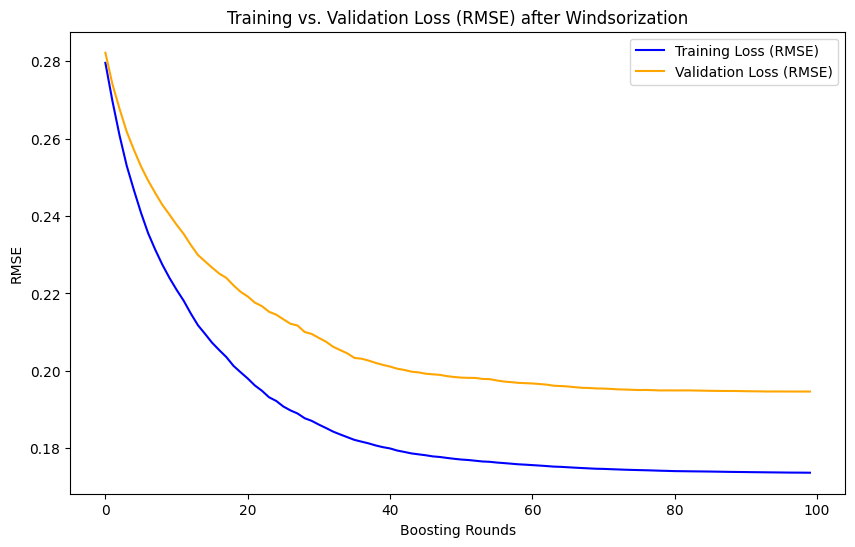

In [173]:
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from scipy.stats.mstats import winsorize

# Define a function to apply windsorization to the dataset
def apply_windsorization(data, lower_percentile=0.01, upper_percentile=0.99):
    """Applies windsorization to cap extreme values."""
    return np.apply_along_axis(
        lambda col: winsorize(col, limits=(lower_percentile, 1-upper_percentile)), axis=0, arr=data
    )

# Apply windsorization to both features and labels
X_train_winsorized = apply_windsorization(X_train)
X_test_winsorized = apply_windsorization(X_test)
y_train_winsorized = winsorize(y_train, limits=(0.05, 0.05))
y_test_winsorized = winsorize(y_test, limits=(0.05, 0.05))

# Re-initialize the model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Cross-validation on windsorized data
cv_scores = cross_val_score(xgb_model, X_train_winsorized, y_train_winsorized, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE after Windsorization: {mean_cv_mse:.2f}")

# Train with DMatrix and early stopping
dtrain = DMatrix(X_train_winsorized, label=y_train_winsorized)
dtest = DMatrix(X_test_winsorized, label=y_test_winsorized)

evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}

xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=True,
    evals_result=evals_result
)

# Predictions and evaluation
xgb_y_pred = xgb_model_trained.predict(dtest)
xgb_mse = mean_squared_error(y_test_winsorized, xgb_y_pred)
xgb_r2 = r2_score(y_test_winsorized, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"After Windsorization - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")

# Plot training vs. validation loss
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) after Windsorization')
plt.legend()
plt.show()


# best outlier predictor (r2 = 0.61)

## copy

In [37]:
# Step 1: Apply KMeans and DBSCAN for clustering and outlier detection
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Clustering on X_train with DBSCAN and KMeans
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)  # Ensure to scale the features

# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=10)  # You can adjust eps and min_samples
X_train['cluster_dbscan'] = dbscan.fit_predict(X_scaled_train)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
X_train['cluster_kmeans'] = kmeans.fit_predict(X_scaled_train)

# Step 3: Identifying outliers from DBSCAN and KMeans
# Outliers for DBSCAN are marked as -1
X_train['outlier_dbscan'] = (X_train['cluster_dbscan'] == -1).astype(int)

# For KMeans, outliers can be defined as data points in small clusters (adjustable threshold)
cluster_sizes_kmeans = X_train['cluster_kmeans'].value_counts()
small_clusters_kmeans = cluster_sizes_kmeans[cluster_sizes_kmeans <= 5].index  # Adjust size threshold
X_train['outlier_kmeans'] = X_train['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Identifying extreme low and high label values as outliers
low_threshold = y_train.quantile(0.05)  # 5th percentile for low outliers
high_threshold = y_train.quantile(0.95)  # 95th percentile for high outliers
X_train['outlier_label'] = ((y_train < low_threshold) | (y_train > high_threshold)).astype(int)

# Combining all outlier flags (DBSCAN, KMeans, and label outliers)
X_train['combined_outlier'] = ((X_train['outlier_dbscan'] + X_train['outlier_kmeans'] + X_train['outlier_label']) > 0).astype(int)

# Step 4: Clustering on X_test
X_scaled_test = scaler.transform(X_test)  # Use the same scaler fitted on X_train

# DBSCAN clustering for X_test
X_test['cluster_dbscan'] = dbscan.fit_predict(X_scaled_test)

# KMeans clustering for X_test
X_test['cluster_kmeans'] = kmeans.predict(X_scaled_test)

# Identifying outliers for X_test
X_test['outlier_dbscan'] = (X_test['cluster_dbscan'] == -1).astype(int)
X_test['outlier_kmeans'] = X_test['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Identifying extreme low and high label values as outliers in X_test
X_test['outlier_label'] = ((y_test < low_threshold) | (y_test > high_threshold)).astype(int)

# Combining all outlier flags (DBSCAN, KMeans, and label outliers)
X_test['combined_outlier'] = ((X_test['outlier_dbscan'] + X_test['outlier_kmeans'] + X_test['outlier_label']) > 0).astype(int)

# Step 5: Train a model to predict based on outliers
# Training a model on outliers detected in the training set
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Train only on the detected outliers
X_outliers = X_train[X_train['combined_outlier'] == 1].drop(['outlier_dbscan', 'outlier_kmeans', 'outlier_label', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train['combined_outlier'] == 1]
outlier_model.fit(X_outliers, y_outliers)

# Step 6: Evaluate the model
def evaluate_model(model, X, y, label="Model"):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mad = np.mean(np.abs(predictions - np.median(y)))
    tail_rmse = np.sqrt(np.mean((predictions[y > np.quantile(y, 0.95)] - y[y > np.quantile(y, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the outlier model
evaluate_model(outlier_model, X_test.drop(['outlier_dbscan', 'outlier_kmeans', 'outlier_label', 'combined_outlier'], axis=1), y_test, label="Outlier Model")


Outlier Model - MSE: 0.05, RMSE: 0.21, R²: 0.54, MAD: 0.17, Tail RMSE: 0.41


array([0.91720694, 0.903615  , 1.0831156 , 0.91720694, 1.4001764 ,
       0.6119333 , 0.84510285, 1.5299165 , 0.91720694, 1.1710042 ,
       0.91720694, 1.1174384 , 0.91720694, 1.0148159 , 0.6151729 ,
       0.9978207 , 0.91720694, 0.6645096 , 0.8332919 , 0.7643054 ,
       0.94705933, 0.9131937 , 0.91720694, 0.91720694, 1.2117485 ,
       1.0099698 , 1.0324669 , 0.8494606 , 0.91720694, 0.91720694,
       1.3006955 , 0.8295295 , 0.91720694, 0.91720694, 0.985386  ,
       1.0324669 , 0.85060143, 0.7403375 , 1.006061  , 1.1352341 ,
       0.9582541 , 0.87491   , 0.9352076 , 0.91720694, 0.91720694,
       0.98347545, 0.9550394 , 1.0739716 , 0.85060143, 0.98450774,
       0.91720694, 0.93156874, 1.1656691 , 0.91720694, 0.91720694,
       1.4004093 , 1.0371094 , 0.95136714, 1.01767   , 0.9949947 ,
       0.9978207 , 0.91720694, 0.7072118 , 0.91720694, 0.94705933,
       1.1309556 , 0.91720694, 1.1096492 , 0.66890234, 0.6806239 ,
       0.91720694, 1.0263214 , 0.9107959 , 0.91720694, 0.93414

In [35]:
# Get outlier predictions from the outlier model
outlier_train_predictions = outlier_model.predict(X_train.drop(['outlier_dbscan', 'outlier_kmeans', 'outlier_label', 'combined_outlier'], axis=1))
outlier_test_predictions = outlier_model.predict(X_test.drop(['outlier_dbscan', 'outlier_kmeans', 'outlier_label', 'combined_outlier'], axis=1))

# Add the outlier predictions as a new feature
X_train['outlier_prediction'] = outlier_train_predictions
X_test['outlier_prediction'] = outlier_test_predictions

# Now train the general model using the extended features
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Train the general model
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


KeyError: "['outlier_label'] not found in axis"

In [204]:
# Add cluster labels from KMeans and DBSCAN to your feature set
X_train['cluster_kmeans'] = kmeans.predict(X_scaled_train)
X_train['cluster_dbscan'] = dbscan.fit_predict(X_scaled_train)

X_test['cluster_kmeans'] = kmeans.predict(X_scaled_test)
X_test['cluster_dbscan'] = dbscan.fit_predict(X_scaled_test)

# Add these features to the general model
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}, RMSE: {xgb_rmse:.2f}")


XGBoost - MSE: 0.04, R²: 0.61, RMSE: 0.20


In [28]:
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBRegressor, DMatrix, train
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Outlier Detection on X_train



# Step 1: Outlier Detection
# Use Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_flags_iso = iso_forest.fit_predict(X_train)
X_train['outlier_iso'] = (outlier_flags_iso == -1).astype(int)

# Use Local Outlier Factor (LOF) to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_flags_lof = lof.fit_predict(X_train)
X_train['outlier_lof'] = (outlier_flags_lof == -1).astype(int)

# Combine the outlier flags (optional)
X_train['combined_outlier'] = ((X_train['outlier_iso'] + X_train['outlier_lof']) > 0).astype(int)

# Step 2: Clustering (to identify high-label clusters)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
X_train['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
X_train['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Step 3: Modify XGBoost to Use Huber and Quantile Loss
def train_xgboost(objective):
    params = {
        'max_depth': 6,
        'learning_rate': 0.1,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'objective': objective,
        'random_state': 42
    }
    #dtrain = DMatrix(X_train.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1), label=y_train)
    dtest = DMatrix(X_test, label=y_test)

    evals_result = {}
    xgb_model_trained = train(
        params,
        dtrain,
        num_boost_round=100,
        evals=[(dtrain, 'train'), (dtest, 'eval')],
        early_stopping_rounds=10,
        verbose_eval=True,
        evals_result=evals_result
    )
    return xgb_model_trained, evals_result

# Train with Huber loss
huber_model, huber_evals_result = train_xgboost('reg:pseudohubererror')

# Train with Quantile loss
#quantile_model, quantile_evals_result = train_xgboost('reg:quantile')

# Step 4: Evaluate Outlier-Specific Model
outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Train only on the detected outliers
X_outliers = X_train[X_train['combined_outlier'] == 1].drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train['combined_outlier'] == 1]
outlier_model.fit(X_outliers, y_outliers)

# Step 5: Evaluation Metrics
def evaluate_model(model, X, y, label="Model"):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mad = np.mean(np.abs(predictions - np.median(y)))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}")
    return predictions

# Evaluate the models
dtest = DMatrix(X_test)
evaluate_model(huber_model, dtest, y_test, label="Huber Loss Model")
#evaluate_model(quantile_model, dtest, y_test, label="Quantile Loss Model")
evaluate_model(outlier_model, X_test, y_test, label="Outlier Model")

# Step 6: Plot Loss Curves for Huber and Quantile Models
plt.figure(figsize=(10, 6))
plt.plot(huber_evals_result['train']['rmse'], label='Huber Train RMSE', color='blue')
plt.plot(huber_evals_result['eval']['rmse'], label='Huber Validation RMSE', color='orange')
#plt.plot(quantile_evals_result['train']['rmse'], label='Quantile Train RMSE', color='green')
#plt.plot(quantile_evals_result['eval']['rmse'], label='Quantile Validation RMSE', color='red')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Huber vs. Quantile Loss - Training and Validation Loss')
plt.legend()
plt.show()


[0]	train-mphe:0.22108	eval-mphe:0.22437
[1]	train-mphe:0.17338	eval-mphe:0.17638
[2]	train-mphe:0.13969	eval-mphe:0.14255
[3]	train-mphe:0.11464	eval-mphe:0.11717
[4]	train-mphe:0.09540	eval-mphe:0.09799
[5]	train-mphe:0.08002	eval-mphe:0.08269
[6]	train-mphe:0.06839	eval-mphe:0.07121
[7]	train-mphe:0.05920	eval-mphe:0.06213
[8]	train-mphe:0.05169	eval-mphe:0.05464
[9]	train-mphe:0.04569	eval-mphe:0.04878
[10]	train-mphe:0.04082	eval-mphe:0.04397
[11]	train-mphe:0.03700	eval-mphe:0.04029
[12]	train-mphe:0.03382	eval-mphe:0.03719
[13]	train-mphe:0.03122	eval-mphe:0.03465
[14]	train-mphe:0.02924	eval-mphe:0.03272
[15]	train-mphe:0.02749	eval-mphe:0.03107
[16]	train-mphe:0.02613	eval-mphe:0.02977
[17]	train-mphe:0.02494	eval-mphe:0.02868
[18]	train-mphe:0.02393	eval-mphe:0.02772
[19]	train-mphe:0.02309	eval-mphe:0.02689
[20]	train-mphe:0.02242	eval-mphe:0.02632
[21]	train-mphe:0.02182	eval-mphe:0.02582
[22]	train-mphe:0.02135	eval-mphe:0.02538
[23]	train-mphe:0.02087	eval-mphe:0.02494
[2

ValueError: feature_names mismatch: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'cluster_dbscan', 'cluster_kmeans'] ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108']
expected cluster_kmeans, cluster_dbscan in input data

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN, KMeans
from xgboost import XGBRegressor, DMatrix, train
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Outlier Detection (unchanged)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_flags_iso = iso_forest.fit_predict(X_train)
X_train['outlier_iso'] = (outlier_flags_iso == -1).astype(int)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_flags_lof = lof.fit_predict(X_train)
X_train['outlier_lof'] = (outlier_flags_lof == -1).astype(int)

X_train['combined_outlier'] = ((X_train['outlier_iso'] + X_train['outlier_lof']) > 0).astype(int)

# Step 2: Clustering (unchanged)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1))  # Drop outlier columns for clustering

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
X_train['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
X_train['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Ensure X_test has the same columns as X_train (without outlier and cluster columns)
X_test = X_test[X_train.drop(['outlier_iso', 'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans'], axis=1).columns]

# Step 3: Modify XGBoost to Use Huber and Quantile Loss
def train_xgboost(objective):
    params = {
        'max_depth': 6,
        'learning_rate': 0.1,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'objective': objective,
        'random_state': 42
    }
    
    # Include the clustering columns (e.g., 'cluster_dbscan', 'cluster_kmeans')
    dtrain = DMatrix(X_train.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1), label=y_train)
    dtest = DMatrix(X_test.drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1), label=y_test)

    evals_result = {}
    xgb_model_trained = train(
        params,
        dtrain,
        num_boost_round=100,
        evals=[(dtrain, 'train'), (dtest, 'eval')],
        early_stopping_rounds=10,
        verbose_eval=True,
        evals_result=evals_result
    )
    return xgb_model_trained, evals_result

# Train with Huber loss
#huber_model, huber_evals_result = train_xgboost('reg:pseudohubererror')

# Train with Quantile loss
#quantile_model, quantile_evals_result = train_xgboost('reg:quantile')

# Step 4: Evaluate Outlier-Specific Model
outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Train only on the detected outliers
X_outliers = X_train[X_train['combined_outlier'] == 1].drop(['outlier_iso', 'outlier_lof', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train['combined_outlier'] == 1]
outlier_model.fit(X_outliers, y_outliers)

# Step 5: Evaluation Metrics
def evaluate_model(model, X, y, label="Model"):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mad = np.mean(np.abs(predictions - np.median(y)))
    tail_rmse = np.sqrt(np.mean((predictions[y > np.quantile(y, 0.95)] - y[y > np.quantile(y, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the models
dtest = DMatrix(X_test)  # Ensure to drop only non-relevant columns
evaluate_model(huber_model, dtest, y_test, label="Huber Loss Model")
#evaluate_model(quantile_model, dtest, y_test, label="Quantile Loss Model")
evaluate_model(outlier_model, X_test, y_test, label="Outlier Model")

'''
# Step 6: Plot Loss Curves for Huber and Quantile Models
plt.figure(figsize=(10, 6))
#plt.plot(huber_evals_result['train']['rmse'], label='Huber Train RMSE', color='blue')
#plt.plot(huber_evals_result['eval']['rmse'], label='Huber Validation RMSE', color='orange')
#plt.plot(quantile_evals_result['train']['rmse'], label='Quantile Train RMSE', color='green')
#plt.plot(quantile_evals_result['eval']['rmse'], label='Quantile Validation RMSE', color='red')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Huber vs. Quantile Loss - Training and Validation Loss')
plt.legend()
plt.show()

'''


Huber Loss Model - MSE: 0.04, RMSE: 0.21, R²: 0.56, MAD: 0.17, Tail RMSE: 0.40


ValueError: feature_names mismatch: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'cluster_dbscan', 'cluster_kmeans'] ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108']
expected cluster_kmeans, cluster_dbscan in input data

In [179]:
first_108_pcs_df.shape

(3835, 108)

## working outlier model

In [36]:
# Step 1: Apply KMeans and DBSCAN for clustering and outlier detection
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Clustering on X_train with DBSCAN and KMeans
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)  # Ensure to scale the features

# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=10)  # You can adjust eps and min_samples
X_train['cluster_dbscan'] = dbscan.fit_predict(X_scaled_train)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
X_train['cluster_kmeans'] = kmeans.fit_predict(X_scaled_train)

# Step 3: Identifying outliers from DBSCAN and KMeans
# Outliers for DBSCAN are marked as -1
X_train['outlier_dbscan'] = (X_train['cluster_dbscan'] == -1).astype(int)

# For KMeans, outliers can be defined as data points in small clusters (adjustable threshold)
cluster_sizes_kmeans = X_train['cluster_kmeans'].value_counts()
small_clusters_kmeans = cluster_sizes_kmeans[cluster_sizes_kmeans <= 5].index  # Adjust size threshold
X_train['outlier_kmeans'] = X_train['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Identifying extreme low and high label values as outliers
low_threshold = y_train.quantile(0.05)  # 5th percentile for low outliers
high_threshold = y_train.quantile(0.95)  # 95th percentile for high outliers
X_train['outlier_label'] = ((y_train < low_threshold) | (y_train > high_threshold)).astype(int)

# Combining all outlier flags (DBSCAN, KMeans, and label outliers)
X_train['combined_outlier'] = ((X_train['outlier_dbscan'] + X_train['outlier_kmeans'] + X_train['outlier_label']) > 0).astype(int)

# Step 4: Clustering on X_test
X_scaled_test = scaler.transform(X_test)  # Use the same scaler fitted on X_train

# DBSCAN clustering for X_test
X_test['cluster_dbscan'] = dbscan.fit_predict(X_scaled_test)

# KMeans clustering for X_test
X_test['cluster_kmeans'] = kmeans.predict(X_scaled_test)

# Identifying outliers for X_test
X_test['outlier_dbscan'] = (X_test['cluster_dbscan'] == -1).astype(int)
X_test['outlier_kmeans'] = X_test['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Identifying extreme low and high label values as outliers in X_test
X_test['outlier_label'] = ((y_test < low_threshold) | (y_test > high_threshold)).astype(int)

# Combining all outlier flags (DBSCAN, KMeans, and label outliers)
X_test['combined_outlier'] = ((X_test['outlier_dbscan'] + X_test['outlier_kmeans'] + X_test['outlier_label']) > 0).astype(int)

# Step 5: Train a model to predict based on outliers
# Training a model on outliers detected in the training set
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Train only on the detected outliers
X_outliers = X_train[X_train['combined_outlier'] == 1].drop(['outlier_dbscan', 'outlier_kmeans', 'outlier_label', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train['combined_outlier'] == 1]
outlier_model.fit(X_outliers, y_outliers)

# Step 6: Evaluate the model
def evaluate_model(model, X, y, label="Model"):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mad = np.mean(np.abs(predictions - np.median(y)))
    tail_rmse = np.sqrt(np.mean((predictions[y > np.quantile(y, 0.95)] - y[y > np.quantile(y, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the outlier model
evaluate_model(outlier_model, X_test.drop(['outlier_dbscan', 'outlier_kmeans', 'outlier_label', 'combined_outlier'], axis=1), y_test, label="Outlier Model")


Outlier Model - MSE: 0.05, RMSE: 0.21, R²: 0.54, MAD: 0.17, Tail RMSE: 0.41


array([0.91720694, 0.903615  , 1.0831156 , 0.91720694, 1.4001764 ,
       0.6119333 , 0.84510285, 1.5299165 , 0.91720694, 1.1710042 ,
       0.91720694, 1.1174384 , 0.91720694, 1.0148159 , 0.6151729 ,
       0.9978207 , 0.91720694, 0.6645096 , 0.8332919 , 0.7643054 ,
       0.94705933, 0.9131937 , 0.91720694, 0.91720694, 1.2117485 ,
       1.0099698 , 1.0324669 , 0.8494606 , 0.91720694, 0.91720694,
       1.3006955 , 0.8295295 , 0.91720694, 0.91720694, 0.985386  ,
       1.0324669 , 0.85060143, 0.7403375 , 1.006061  , 1.1352341 ,
       0.9582541 , 0.87491   , 0.9352076 , 0.91720694, 0.91720694,
       0.98347545, 0.9550394 , 1.0739716 , 0.85060143, 0.98450774,
       0.91720694, 0.93156874, 1.1656691 , 0.91720694, 0.91720694,
       1.4004093 , 1.0371094 , 0.95136714, 1.01767   , 0.9949947 ,
       0.9978207 , 0.91720694, 0.7072118 , 0.91720694, 0.94705933,
       1.1309556 , 0.91720694, 1.1096492 , 0.66890234, 0.6806239 ,
       0.91720694, 1.0263214 , 0.9107959 , 0.91720694, 0.93414

In [32]:
# Step 1: Apply KMeans and DBSCAN for clustering and outlier detection
X = first_108_pcs_df  # PCA-transformed features
y = one_hot_encoded_df2['proficient_score']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Clustering on X_train with DBSCAN and KMeans
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)  # Ensure to scale the features

# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=10)  # You can adjust eps and min_samples
X_train['cluster_dbscan'] = dbscan.fit_predict(X_scaled_train)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
X_train['cluster_kmeans'] = kmeans.fit_predict(X_scaled_train)

# Step 3: Identifying outliers from DBSCAN and KMeans
# Outliers for DBSCAN are marked as -1
X_train['outlier_dbscan'] = (X_train['cluster_dbscan'] == -1).astype(int)

# For KMeans, outliers can be defined as data points in small clusters (adjustable threshold)
cluster_sizes_kmeans = X_train['cluster_kmeans'].value_counts()
small_clusters_kmeans = cluster_sizes_kmeans[cluster_sizes_kmeans <= 5].index  # Adjust size threshold
X_train['outlier_kmeans'] = X_train['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Combining both outlier flags
X_train['combined_outlier'] = ((X_train['outlier_dbscan'] + X_train['outlier_kmeans']) > 0).astype(int)

# Step 4: Clustering on X_test
X_scaled_test = scaler.transform(X_test)  # Use the same scaler fitted on X_train

# DBSCAN clustering for X_test
X_test['cluster_dbscan'] = dbscan.fit_predict(X_scaled_test)

# KMeans clustering for X_test
X_test['cluster_kmeans'] = kmeans.predict(X_scaled_test)

# Identifying outliers for X_test
X_test['outlier_dbscan'] = (X_test['cluster_dbscan'] == -1).astype(int)
X_test['outlier_kmeans'] = X_test['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Combining outliers for X_test
X_test['combined_outlier'] = ((X_test['outlier_dbscan'] + X_test['outlier_kmeans']) > 0).astype(int)

# Step 5: Train a model to predict based on outliers
# Training a model on outliers detected in the training set
outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

# Train only on the detected outliers
X_outliers = X_train[X_train['combined_outlier'] == 1].drop(['outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train['combined_outlier'] == 1]
outlier_model.fit(X_outliers, y_outliers)

# Step 6: Evaluate the model
def evaluate_model(model, X, y, label="Model"):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mad = np.mean(np.abs(predictions - np.median(y)))
    tail_rmse = np.sqrt(np.mean((predictions[y > np.quantile(y, 0.95)] - y[y > np.quantile(y, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the outlier model
evaluate_model(outlier_model, X_test.drop(['outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1), y_test, label="Outlier Model")


Outlier Model - MSE: 0.05, RMSE: 0.22, R²: 0.49, MAD: 0.19, Tail RMSE: 0.37


array([1.084779  , 0.90087014, 1.064904  , 1.084779  , 1.4331878 ,
       0.6194221 , 0.8558644 , 1.5282253 , 1.084779  , 1.1598583 ,
       1.084779  , 1.1128541 , 1.084779  , 1.0380626 , 0.60484296,
       0.99833417, 1.084779  , 0.6582242 , 0.87536937, 0.75930005,
       0.9453638 , 0.9428567 , 1.084779  , 1.084779  , 1.2258708 ,
       1.0086951 , 1.0207796 , 0.84224844, 1.084779  , 1.084779  ,
       1.3018715 , 0.8175288 , 1.084779  , 1.084779  , 0.99234575,
       1.0207796 , 0.8528984 , 0.7970866 , 1.0270672 , 1.1282148 ,
       0.9526762 , 0.8928742 , 0.9271724 , 1.084779  , 1.084779  ,
       0.9858307 , 0.9517151 , 1.0814964 , 0.8528984 , 0.9937803 ,
       1.084779  , 0.92519766, 1.1350842 , 1.084779  , 1.084779  ,
       1.3945279 , 1.0595087 , 0.9611085 , 1.0111291 , 0.9816977 ,
       0.99833417, 1.084779  , 0.69617486, 1.084779  , 0.9453638 ,
       1.1188024 , 1.084779  , 1.1089923 , 0.6645583 , 0.6812129 ,
       1.084779  , 1.0283883 , 0.9060794 , 1.084779  , 1.01824

In [25]:
# Step 1: Apply Isolation Forest and LOF for outlier detection on X_train and X_test
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Isolation Forest for outlier detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest_train = iso_forest.fit_predict(X_train)
iso_forest_test = iso_forest.predict(X_test)

# LOF for outlier detection
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.15) #20 --> 50

# Using fit_predict for LOF to detect outliers
lof_train = lof.fit_predict(X_train)
lof_test = lof.fit_predict(X_test)

# Step 2: Save new versions of X_train and X_test with outlier columns
X_train_new = X_train.copy()
X_test_new = X_test.copy()

# Add Isolation Forest and LOF outlier flags (1: inlier, -1: outlier)
X_train_new['outlier_iso_forest'] = (iso_forest_train == -1).astype(int)
X_test_new['outlier_iso_forest'] = (iso_forest_test == -1).astype(int)

X_train_new['outlier_lof'] = (lof_train == -1).astype(int)
X_test_new['outlier_lof'] = (lof_test == -1).astype(int)

# Step 3: Apply KMeans and DBSCAN for clustering and outlier detection
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train_new.drop(['outlier_iso_forest', 'outlier_lof'], axis=1))  # Drop outlier columns before scaling
X_scaled_test = scaler.transform(X_test_new.drop(['outlier_iso_forest', 'outlier_lof'], axis=1))

# DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=8)
X_train_new['cluster_dbscan'] = dbscan.fit_predict(X_scaled_train)

# KMeans clustering
kmeans = KMeans(n_clusters=50, random_state=42)
X_train_new['cluster_kmeans'] = kmeans.fit_predict(X_scaled_train)

# Step 4: Identifying outliers from DBSCAN and KMeans
# Outliers for DBSCAN are marked as -1
X_train_new['outlier_dbscan'] = (X_train_new['cluster_dbscan'] == -1).astype(int)

# For KMeans, outliers can be defined as data points in small clusters (adjustable threshold)
cluster_sizes_kmeans = X_train_new['cluster_kmeans'].value_counts()
small_clusters_kmeans = cluster_sizes_kmeans[cluster_sizes_kmeans <= 5].index  # Adjust size threshold
X_train_new['outlier_kmeans'] = X_train_new['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Combining all outlier flags
X_train_new['combined_outlier'] = ((X_train_new['outlier_iso_forest'] + X_train_new['outlier_lof'] + X_train_new['outlier_dbscan'] + X_train_new['outlier_kmeans']) > 0).astype(int)

# Step 5: Clustering on X_test
X_test_new['cluster_dbscan'] = dbscan.fit_predict(X_scaled_test)
X_test_new['cluster_kmeans'] = kmeans.predict(X_scaled_test)

# Identifying outliers for X_test
X_test_new['outlier_dbscan'] = (X_test_new['cluster_dbscan'] == -1).astype(int)
X_test_new['outlier_kmeans'] = X_test_new['cluster_kmeans'].isin(small_clusters_kmeans).astype(int)

# Combining outliers for X_test
X_test_new['outlier_iso_forest'] = (iso_forest_test == -1).astype(int)
X_test_new['outlier_lof'] = (lof_test == -1).astype(int)

X_test_new['combined_outlier'] = ((X_test_new['outlier_iso_forest'] + X_test_new['outlier_lof'] + X_test_new['outlier_dbscan'] + X_test_new['outlier_kmeans']) > 0).astype(int)

# Step 6: Train a model to predict based on outliers
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train only on the detected outliers
X_outliers = X_train_new[X_train_new['combined_outlier'] == 1].drop(['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1)
y_outliers = y_train[X_train_new['combined_outlier'] == 1]

outlier_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

outlier_model.fit(X_outliers, y_outliers)

# Step 7: Evaluate the model
def evaluate_model(model, X, y, label="Model"):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    mad = np.mean(np.abs(predictions - np.median(y)))
    tail_rmse = np.sqrt(np.mean((predictions[y > np.quantile(y, 0.95)] - y[y > np.quantile(y, 0.95)])**2))
    
    print(f"{label} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, MAD: {mad:.2f}, Tail RMSE: {tail_rmse:.2f}")
    return predictions

# Evaluate the outlier model
evaluate_model(outlier_model, X_test_new.drop(['outlier_iso_forest', 'outlier_lof', 'outlier_dbscan', 'outlier_kmeans', 'combined_outlier'], axis=1), y_test, label="Outlier Model")


Outlier Model - MSE: 0.05, RMSE: 0.22, R²: 0.51, MAD: 0.17, Tail RMSE: 0.43


array([1.0025399 , 0.9161652 , 1.0912857 , 1.0025399 , 1.3480572 ,
       0.6130191 , 0.8366981 , 1.5250242 , 1.0025399 , 1.191931  ,
       1.0025399 , 1.1259372 , 1.0025399 , 1.0375531 , 0.5955983 ,
       0.8253031 , 1.0025399 , 0.6526784 , 0.85111785, 0.7607408 ,
       0.939727  , 0.9362954 , 1.0025399 , 1.0025399 , 1.2198639 ,
       0.999881  , 1.0393524 , 0.83456653, 1.0025399 , 1.0025399 ,
       1.32825   , 0.8213064 , 1.0025399 , 1.0025399 , 0.9857711 ,
       1.0393524 , 0.8654008 , 0.76268244, 1.0268645 , 1.1309626 ,
       0.92738235, 0.8962594 , 0.93670523, 1.0025399 , 1.0025399 ,
       0.9859648 , 0.95539075, 1.0189798 , 0.8654008 , 0.96439743,
       1.0025399 , 0.9275867 , 1.1404333 , 1.0025399 , 1.0025399 ,
       1.4091644 , 1.0030336 , 0.96634173, 0.99018025, 1.0005537 ,
       0.8253031 , 1.0025399 , 0.7203506 , 1.0025399 , 0.939727  ,
       1.1229795 , 1.0025399 , 1.1113172 , 0.66241294, 0.6762563 ,
       1.0025399 , 1.0107602 , 1.0146326 , 1.0025399 , 1.06781

# working outlier detector

In [51]:
# Step 1: Ensure feature consistency
# Drop the clustering columns if not present in X_test
columns_to_drop = ['cluster_dbscan', 'cluster_kmeans', 'outlier_iso', 'outlier_lof', 'combined_outlier']
X_train_aligned = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test_aligned = X_test  # Ensure X_test has no extra columns

# Step 2: Train XGBoost with consistent features
def train_xgboost(objective):
    params = {
        'max_depth': 6,
        'learning_rate': 0.1,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'objective': objective,
        'random_state': 42
    }
    dtrain = DMatrix(X_train_aligned, label=y_train)
    dtest = DMatrix(X_test_aligned, label=y_test)

    evals_result = {}
    xgb_model_trained = train(
        params,
        dtrain,
        num_boost_round=100,
        evals=[(dtrain, 'train'), (dtest, 'eval')],
        early_stopping_rounds=10,
        verbose_eval=True,
        evals_result=evals_result
    )
    return xgb_model_trained, evals_result

# Train with Huber loss
huber_model, huber_evals_result = train_xgboost('reg:pseudohubererror')

# Train with Quantile loss
quantile_model, quantile_evals_result = train_xgboost('reg:quantile')

assert list(X_train_aligned.columns) == list(X_test_aligned.columns), "Feature names do not match!"


ValueError: feature_names mismatch: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108'] ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'outlier_iso', 'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans']
training data did not have the following fields: outlier_iso, cluster_kmeans, cluster_dbscan, outlier_lof, combined_outlier

In [52]:
import xgboost as xgb

params = {
    'objective': 'reg:quantile',
    'alpha': 0.5  # Adjust as needed
}
dtrain = xgb.DMatrix(X_train_aligned, label=y_train)
dtest = xgb.DMatrix(X_test_aligned, label=y_test)

evals_result = {}
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10,
    evals=[(dtest, 'eval')],
    evals_result=evals_result
)

print(evals_result)


ValueError: feature_names mismatch: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108'] ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84', 'PC85', 'PC86', 'PC87', 'PC88', 'PC89', 'PC90', 'PC91', 'PC92', 'PC93', 'PC94', 'PC95', 'PC96', 'PC97', 'PC98', 'PC99', 'PC100', 'PC101', 'PC102', 'PC103', 'PC104', 'PC105', 'PC106', 'PC107', 'PC108', 'outlier_iso', 'outlier_lof', 'combined_outlier', 'cluster_dbscan', 'cluster_kmeans']
training data did not have the following fields: outlier_iso, cluster_kmeans, cluster_dbscan, outlier_lof, combined_outlier

In [ ]:
'''
from xgboost import XGBRegressor, DMatrix, train, cv
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters tuning with grid search
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 1],
    'reg_lambda': [0.01, 0.1, 1]
}

# Initialize and train with GridSearchCV
xgb_grid = XGBRegressor(random_state=42, objective='reg:squarederror')
grid_search = GridSearchCV(xgb_grid, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best estimator found by GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Use DMatrix for early stopping and evaluation tracking
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Prepare params for DMatrix training
params = best_xgb_model.get_params()
params['objective'] = 'reg:squarederror'

# Perform training with early stopping
evals_result = {}
best_xgb_model_trained = train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=15,
    verbose_eval=True,
    evals_result=evals_result
)

# Plot training vs validation losses for analysis
train_loss = evals_result['train']['rmse']
validation_loss = evals_result['eval']['rmse']
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss (RMSE)', color='blue')
plt.plot(validation_loss, label='Validation Loss (RMSE)', color='orange')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.title('Training vs. Validation Loss (RMSE) per Boosting Round')
plt.legend()
plt.show()

# Predict on the test set
xgb_y_pred = best_xgb_model_trained.predict(dtest)

# Evaluate performance
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_rmse
'''

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


# extra preliminary models

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_y_pred = gb_model.predict(X_test)

# Evaluate
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
print(f"Gradient Boosting - MSE: {gb_mse:.2f}, R²: {gb_r2:.2f}, RMSE: {gb_rmse:.2f}")


Gradient Boosting - MSE: 0.02, R²: 0.55, RMSE: 0.14


In [140]:
# Step 4: Extract Feature Importances
importance_dict_gb = dict(zip(X_train.columns, gb_model.feature_importances_))
importance_df_gb = pd.DataFrame(list(importance_dict_gb.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)


# Step 6: Filter features with Importance > 0 (or a lower threshold)
filtered_importance_df_gb = importance_df_gb[importance_df_gb['Importance'] > 0.01]

# Step 7: Print the filtered importance table for Gradient Boosting
print("Filtered Feature Importances (Gradient Boosting):")
print(filtered_importance_df_gb)

Filtered Feature Importances (Gradient Boosting):
   Feature  Importance
1      PC2    0.567158
2      PC3    0.036438
81    PC82    0.032996
4      PC5    0.024791
3      PC4    0.020366
29    PC30    0.019563
94    PC95    0.017897
25    PC26    0.017076
55    PC56    0.015056
18    PC19    0.012400
61    PC62    0.012077
40    PC41    0.012035


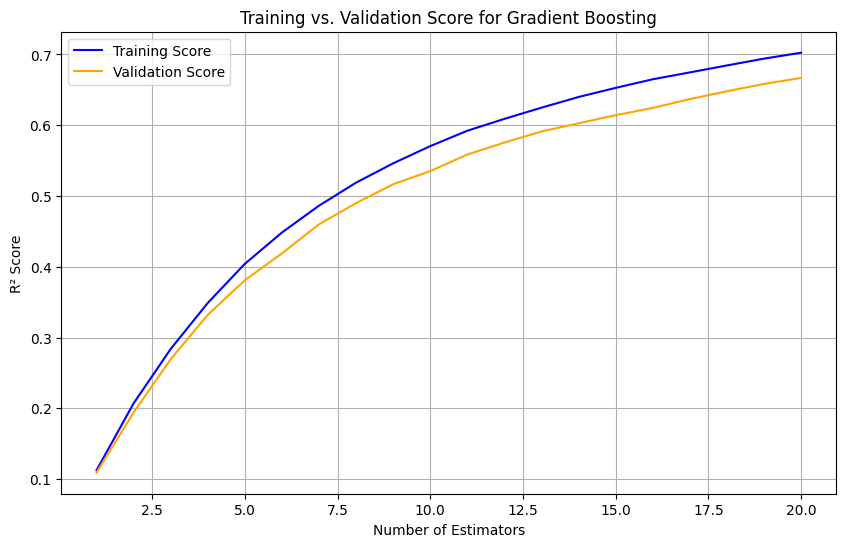

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Example: Ensure your X_train and y_train are defined
# X_train = ... (your features)
# y_train = ... (your target variable)

# Step 1: Initialize lists for scores
train_scores = []
test_scores = []

# Step 2: Iterate through a reduced number of estimators
for i in range(1, 21):  # Reduced to 20 for faster computation
    gb_model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, random_state=42)
    
    # Use cross-validation for training score
    train_cv_score = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2').mean()
    train_scores.append(train_cv_score)

    # Fit the model on the full training data
    gb_model.fit(X_train, y_train)
    
    # Calculate validation score
    test_scores.append(gb_model.score(X_test, y_test))

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_scores, label='Training Score', color='blue')
plt.plot(range(1, 21), test_scores, label='Validation Score', color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.title('Training vs. Validation Score for Gradient Boosting')
plt.legend()
plt.grid(True)
plt.show()
